# ONLINE LEARNING

### What is Online Learning ?

Online learning is a machine learning method in which data becomes available in a sequential order and is used to update the best predictor for future data at each step, as opposed to batch learning which must be trained using all the available data and it's incapable of learning incrementally. 

Machine learning models are usually static things. They are essentially collections of parameters, after you've trained a model its parameters don't change (horizontal scalability). But what about new data? If we just train a model once and never touch it again, we’re missing out the information more data could provide us. This is especially important in environments where behaviours change quickly.

In online learning, you train the system incrementally by feeding it data instances sequentially, either individually or in small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives.

One important parameter of online learning systems is how fast they should adapt to changing data (**Learning Rate**). If you set a high learning rate, then your system will rapidly adapt to new data, but it also tends to quickly forget the old data. On the other hand, if you set a low learning rate, the system will have more inertia, it will learn more slowly but it will also be less sensitive to noise in the new data or outliers.

### Why Online Learning ?

Online learning is a great method essentially in three main cases:
* **Continuos Flow**: Systems that receive data as a continuous flow, for example stock prices, and need to adapt to change rapidly or autonomously.


* **Limited Computing Resources**: Once an online learning system has learned about new data instances, it doesn't need them anymore, so you can discard them and this can save a huge amount of space.


* **Huge Datasets**: Can also be used to train systems on huge datasets that cannot fit in one machine's main memory. The algorithm loads part of the data, runs a training step on that data and repeats the process until it has run on all of the data.

### Project and Dataset Description

### Libraries: River and Scikit-Learn

**River** is a Python library for online machine learning. It is the result of a merger between creme and scikit-multiflow for doing machine learning on streaming data.

Here are some benefits of using River (and online machine learning in general):
* **Incremental**: models can update themselves in real-time.
* **Adaptive**: models can adapt to concept drift.
* **Production-ready**: working with data streams makes it simple to replicate production scenarios during model development.
* **Efficient**: models don't have to be retrained and require little compute power, which lowers their carbon footprint
* **Fast**: when the goal is to learn and predict with a single instance at a time, then River is an order of magnitude faster than PyTorch, Tensorflow, and Scikit-learn.

**Scikit-learn** does not treat incremental learning as a 'first-class citizen', only a few online learning implementations are included in the library, there are only 5 algorithm available for classification tasks in the online learning mode. In river we can implement linear models with a wide array of optimizers, nearest neighbors, decision trees, naive bayes and much more in a super fast way. Anyway in Scikit-learn there are some algorithms that aren't yet present in the river library (e.g. SGDClassifier).

In this project we'll use the River and Scikit-learn libraries for applying these fundamental models in a multiclass classification task:
* **Logistic Regression** (River)
* **Adaptive Random Forest Classifier** (River)
* **Gaussian Naive Bayes** (River)
* **SoftMax Regression** (River)
* **K-Nearest Neighbors** (River)
* **SGDClassifier(SVM)** (Scikit-learn)

In [25]:
from river.linear_model import LogisticRegression
from river.multiclass import OneVsRestClassifier
from river.preprocessing import StandardScaler
from river.compose import Pipeline
from river.metrics import Accuracy
from river import stream

In [26]:
# construct our data dictionary which maps the data types of the
# columns in the CSV file to built-in data types
print("[INFO] building column names...")
types = {'fixed acidity':float, 'volatile acidity':float, 'citric acid':float, 'residual sugar':float, 'chlorides':float,
         'free sulfur dioxide':float, 'total sulfur dioxide':float, 'density':float, 'pH':float, 'sulphates':float,
         'alcohol':float}
types["quality"] = int

[INFO] building column names...


# LOGISTIC REGRESSION          (54.21%)

In [27]:
classifier = LogisticRegression()
classifier._multiclass
#Dire quindi che si usa il wrapper OnevsRestClassifier

False

In [28]:
dataset = stream.iter_csv("winequality-white.csv", target="quality", converters=types)
 
#construct our pipeline
model = Pipeline(
    StandardScaler(),
    OneVsRestClassifier(classifier=LogisticRegression(intercept_lr = 0.01)))

In [29]:
#FARE CICLO SUL PARAMETRO intercept_lr !!!

In [30]:
# initialize our metric
print("[INFO] starting training...")
metric = Accuracy()

values = []

# loop over the dataset
for (i, (X, y)) in enumerate(dataset):
    # make predictions on the current set of features, train the
    # model on the features, and then update our metric
    preds = model.predict_one(X)
    model = model.learn_one(X, y)
    metric = metric.update(y, preds)
    values.append((i, float(str(metric).split(':')[1].strip()[:-1])))
    print("[INFO] update {} - {}".format(i, metric))
    
# show the accuracy of the model
print("[INFO] final - {}".format(metric))

[INFO] starting training...
[INFO] update 0 - Accuracy: 0.00%
[INFO] update 1 - Accuracy: 50.00%
[INFO] update 2 - Accuracy: 66.67%
[INFO] update 3 - Accuracy: 75.00%
[INFO] update 4 - Accuracy: 80.00%
[INFO] update 5 - Accuracy: 83.33%
[INFO] update 6 - Accuracy: 85.71%
[INFO] update 7 - Accuracy: 87.50%
[INFO] update 8 - Accuracy: 88.89%
[INFO] update 9 - Accuracy: 90.00%
[INFO] update 10 - Accuracy: 81.82%
[INFO] update 11 - Accuracy: 83.33%
[INFO] update 12 - Accuracy: 84.62%
[INFO] update 13 - Accuracy: 78.57%
[INFO] update 14 - Accuracy: 80.00%
[INFO] update 15 - Accuracy: 81.25%
[INFO] update 16 - Accuracy: 82.35%
[INFO] update 17 - Accuracy: 77.78%
[INFO] update 18 - Accuracy: 73.68%
[INFO] update 19 - Accuracy: 70.00%
[INFO] update 20 - Accuracy: 71.43%
[INFO] update 21 - Accuracy: 68.18%
[INFO] update 22 - Accuracy: 65.22%
[INFO] update 23 - Accuracy: 62.50%
[INFO] update 24 - Accuracy: 64.00%
[INFO] update 25 - Accuracy: 65.38%
[INFO] update 26 - Accuracy: 66.67%
[INFO] upda

[INFO] update 328 - Accuracy: 49.54%
[INFO] update 329 - Accuracy: 49.39%
[INFO] update 330 - Accuracy: 49.24%
[INFO] update 331 - Accuracy: 49.10%
[INFO] update 332 - Accuracy: 48.95%
[INFO] update 333 - Accuracy: 49.10%
[INFO] update 334 - Accuracy: 48.96%
[INFO] update 335 - Accuracy: 48.81%
[INFO] update 336 - Accuracy: 48.96%
[INFO] update 337 - Accuracy: 48.82%
[INFO] update 338 - Accuracy: 48.67%
[INFO] update 339 - Accuracy: 48.53%
[INFO] update 340 - Accuracy: 48.39%
[INFO] update 341 - Accuracy: 48.54%
[INFO] update 342 - Accuracy: 48.40%
[INFO] update 343 - Accuracy: 48.26%
[INFO] update 344 - Accuracy: 48.41%
[INFO] update 345 - Accuracy: 48.55%
[INFO] update 346 - Accuracy: 48.41%
[INFO] update 347 - Accuracy: 48.28%
[INFO] update 348 - Accuracy: 48.14%
[INFO] update 349 - Accuracy: 48.00%
[INFO] update 350 - Accuracy: 47.86%
[INFO] update 351 - Accuracy: 47.73%
[INFO] update 352 - Accuracy: 47.88%
[INFO] update 353 - Accuracy: 47.74%
[INFO] update 354 - Accuracy: 47.89%
[

[INFO] update 701 - Accuracy: 49.57%
[INFO] update 702 - Accuracy: 49.50%
[INFO] update 703 - Accuracy: 49.57%
[INFO] update 704 - Accuracy: 49.50%
[INFO] update 705 - Accuracy: 49.43%
[INFO] update 706 - Accuracy: 49.36%
[INFO] update 707 - Accuracy: 49.44%
[INFO] update 708 - Accuracy: 49.37%
[INFO] update 709 - Accuracy: 49.44%
[INFO] update 710 - Accuracy: 49.51%
[INFO] update 711 - Accuracy: 49.58%
[INFO] update 712 - Accuracy: 49.65%
[INFO] update 713 - Accuracy: 49.72%
[INFO] update 714 - Accuracy: 49.79%
[INFO] update 715 - Accuracy: 49.72%
[INFO] update 716 - Accuracy: 49.65%
[INFO] update 717 - Accuracy: 49.72%
[INFO] update 718 - Accuracy: 49.65%
[INFO] update 719 - Accuracy: 49.58%
[INFO] update 720 - Accuracy: 49.65%
[INFO] update 721 - Accuracy: 49.58%
[INFO] update 722 - Accuracy: 49.65%
[INFO] update 723 - Accuracy: 49.59%
[INFO] update 724 - Accuracy: 49.52%
[INFO] update 725 - Accuracy: 49.59%
[INFO] update 726 - Accuracy: 49.52%
[INFO] update 727 - Accuracy: 49.45%
[

[INFO] update 948 - Accuracy: 47.21%
[INFO] update 949 - Accuracy: 47.16%
[INFO] update 950 - Accuracy: 47.21%
[INFO] update 951 - Accuracy: 47.27%
[INFO] update 952 - Accuracy: 47.32%
[INFO] update 953 - Accuracy: 47.27%
[INFO] update 954 - Accuracy: 47.33%
[INFO] update 955 - Accuracy: 47.38%
[INFO] update 956 - Accuracy: 47.44%
[INFO] update 957 - Accuracy: 47.49%
[INFO] update 958 - Accuracy: 47.55%
[INFO] update 959 - Accuracy: 47.50%
[INFO] update 960 - Accuracy: 47.45%
[INFO] update 961 - Accuracy: 47.40%
[INFO] update 962 - Accuracy: 47.35%
[INFO] update 963 - Accuracy: 47.30%
[INFO] update 964 - Accuracy: 47.25%
[INFO] update 965 - Accuracy: 47.20%
[INFO] update 966 - Accuracy: 47.16%
[INFO] update 967 - Accuracy: 47.21%
[INFO] update 968 - Accuracy: 47.27%
[INFO] update 969 - Accuracy: 47.22%
[INFO] update 970 - Accuracy: 47.17%
[INFO] update 971 - Accuracy: 47.22%
[INFO] update 972 - Accuracy: 47.28%
[INFO] update 973 - Accuracy: 47.33%
[INFO] update 974 - Accuracy: 47.28%
[

[INFO] update 1261 - Accuracy: 46.91%
[INFO] update 1262 - Accuracy: 46.95%
[INFO] update 1263 - Accuracy: 46.91%
[INFO] update 1264 - Accuracy: 46.88%
[INFO] update 1265 - Accuracy: 46.84%
[INFO] update 1266 - Accuracy: 46.80%
[INFO] update 1267 - Accuracy: 46.77%
[INFO] update 1268 - Accuracy: 46.81%
[INFO] update 1269 - Accuracy: 46.77%
[INFO] update 1270 - Accuracy: 46.73%
[INFO] update 1271 - Accuracy: 46.78%
[INFO] update 1272 - Accuracy: 46.82%
[INFO] update 1273 - Accuracy: 46.86%
[INFO] update 1274 - Accuracy: 46.82%
[INFO] update 1275 - Accuracy: 46.87%
[INFO] update 1276 - Accuracy: 46.83%
[INFO] update 1277 - Accuracy: 46.87%
[INFO] update 1278 - Accuracy: 46.91%
[INFO] update 1279 - Accuracy: 46.95%
[INFO] update 1280 - Accuracy: 46.92%
[INFO] update 1281 - Accuracy: 46.88%
[INFO] update 1282 - Accuracy: 46.92%
[INFO] update 1283 - Accuracy: 46.88%
[INFO] update 1284 - Accuracy: 46.85%
[INFO] update 1285 - Accuracy: 46.81%
[INFO] update 1286 - Accuracy: 46.78%
[INFO] updat

[INFO] update 1512 - Accuracy: 47.32%
[INFO] update 1513 - Accuracy: 47.36%
[INFO] update 1514 - Accuracy: 47.33%
[INFO] update 1515 - Accuracy: 47.36%
[INFO] update 1516 - Accuracy: 47.40%
[INFO] update 1517 - Accuracy: 47.43%
[INFO] update 1518 - Accuracy: 47.47%
[INFO] update 1519 - Accuracy: 47.43%
[INFO] update 1520 - Accuracy: 47.47%
[INFO] update 1521 - Accuracy: 47.50%
[INFO] update 1522 - Accuracy: 47.47%
[INFO] update 1523 - Accuracy: 47.51%
[INFO] update 1524 - Accuracy: 47.54%
[INFO] update 1525 - Accuracy: 47.58%
[INFO] update 1526 - Accuracy: 47.61%
[INFO] update 1527 - Accuracy: 47.64%
[INFO] update 1528 - Accuracy: 47.68%
[INFO] update 1529 - Accuracy: 47.71%
[INFO] update 1530 - Accuracy: 47.75%
[INFO] update 1531 - Accuracy: 47.72%
[INFO] update 1532 - Accuracy: 47.68%
[INFO] update 1533 - Accuracy: 47.72%
[INFO] update 1534 - Accuracy: 47.75%
[INFO] update 1535 - Accuracy: 47.79%
[INFO] update 1536 - Accuracy: 47.76%
[INFO] update 1537 - Accuracy: 47.79%
[INFO] updat

[INFO] update 1775 - Accuracy: 48.70%
[INFO] update 1776 - Accuracy: 48.68%
[INFO] update 1777 - Accuracy: 48.71%
[INFO] update 1778 - Accuracy: 48.68%
[INFO] update 1779 - Accuracy: 48.65%
[INFO] update 1780 - Accuracy: 48.62%
[INFO] update 1781 - Accuracy: 48.60%
[INFO] update 1782 - Accuracy: 48.63%
[INFO] update 1783 - Accuracy: 48.60%
[INFO] update 1784 - Accuracy: 48.57%
[INFO] update 1785 - Accuracy: 48.60%
[INFO] update 1786 - Accuracy: 48.57%
[INFO] update 1787 - Accuracy: 48.55%
[INFO] update 1788 - Accuracy: 48.52%
[INFO] update 1789 - Accuracy: 48.49%
[INFO] update 1790 - Accuracy: 48.46%
[INFO] update 1791 - Accuracy: 48.49%
[INFO] update 1792 - Accuracy: 48.52%
[INFO] update 1793 - Accuracy: 48.49%
[INFO] update 1794 - Accuracy: 48.52%
[INFO] update 1795 - Accuracy: 48.50%
[INFO] update 1796 - Accuracy: 48.47%
[INFO] update 1797 - Accuracy: 48.44%
[INFO] update 1798 - Accuracy: 48.42%
[INFO] update 1799 - Accuracy: 48.44%
[INFO] update 1800 - Accuracy: 48.42%
[INFO] updat

[INFO] update 2125 - Accuracy: 50.33%
[INFO] update 2126 - Accuracy: 50.35%
[INFO] update 2127 - Accuracy: 50.33%
[INFO] update 2128 - Accuracy: 50.31%
[INFO] update 2129 - Accuracy: 50.28%
[INFO] update 2130 - Accuracy: 50.31%
[INFO] update 2131 - Accuracy: 50.33%
[INFO] update 2132 - Accuracy: 50.35%
[INFO] update 2133 - Accuracy: 50.37%
[INFO] update 2134 - Accuracy: 50.40%
[INFO] update 2135 - Accuracy: 50.37%
[INFO] update 2136 - Accuracy: 50.40%
[INFO] update 2137 - Accuracy: 50.37%
[INFO] update 2138 - Accuracy: 50.40%
[INFO] update 2139 - Accuracy: 50.42%
[INFO] update 2140 - Accuracy: 50.44%
[INFO] update 2141 - Accuracy: 50.47%
[INFO] update 2142 - Accuracy: 50.44%
[INFO] update 2143 - Accuracy: 50.42%
[INFO] update 2144 - Accuracy: 50.44%
[INFO] update 2145 - Accuracy: 50.47%
[INFO] update 2146 - Accuracy: 50.49%
[INFO] update 2147 - Accuracy: 50.51%
[INFO] update 2148 - Accuracy: 50.54%
[INFO] update 2149 - Accuracy: 50.56%
[INFO] update 2150 - Accuracy: 50.58%
[INFO] updat

[INFO] update 2450 - Accuracy: 51.45%
[INFO] update 2451 - Accuracy: 51.47%
[INFO] update 2452 - Accuracy: 51.45%
[INFO] update 2453 - Accuracy: 51.47%
[INFO] update 2454 - Accuracy: 51.49%
[INFO] update 2455 - Accuracy: 51.47%
[INFO] update 2456 - Accuracy: 51.49%
[INFO] update 2457 - Accuracy: 51.51%
[INFO] update 2458 - Accuracy: 51.48%
[INFO] update 2459 - Accuracy: 51.50%
[INFO] update 2460 - Accuracy: 51.52%
[INFO] update 2461 - Accuracy: 51.54%
[INFO] update 2462 - Accuracy: 51.56%
[INFO] update 2463 - Accuracy: 51.54%
[INFO] update 2464 - Accuracy: 51.56%
[INFO] update 2465 - Accuracy: 51.58%
[INFO] update 2466 - Accuracy: 51.60%
[INFO] update 2467 - Accuracy: 51.62%
[INFO] update 2468 - Accuracy: 51.64%
[INFO] update 2469 - Accuracy: 51.66%
[INFO] update 2470 - Accuracy: 51.68%
[INFO] update 2471 - Accuracy: 51.66%
[INFO] update 2472 - Accuracy: 51.68%
[INFO] update 2473 - Accuracy: 51.66%
[INFO] update 2474 - Accuracy: 51.64%
[INFO] update 2475 - Accuracy: 51.66%
[INFO] updat

[INFO] update 2720 - Accuracy: 51.08%
[INFO] update 2721 - Accuracy: 51.10%
[INFO] update 2722 - Accuracy: 51.12%
[INFO] update 2723 - Accuracy: 51.14%
[INFO] update 2724 - Accuracy: 51.16%
[INFO] update 2725 - Accuracy: 51.14%
[INFO] update 2726 - Accuracy: 51.16%
[INFO] update 2727 - Accuracy: 51.17%
[INFO] update 2728 - Accuracy: 51.15%
[INFO] update 2729 - Accuracy: 51.17%
[INFO] update 2730 - Accuracy: 51.19%
[INFO] update 2731 - Accuracy: 51.21%
[INFO] update 2732 - Accuracy: 51.23%
[INFO] update 2733 - Accuracy: 51.24%
[INFO] update 2734 - Accuracy: 51.26%
[INFO] update 2735 - Accuracy: 51.24%
[INFO] update 2736 - Accuracy: 51.26%
[INFO] update 2737 - Accuracy: 51.24%
[INFO] update 2738 - Accuracy: 51.26%
[INFO] update 2739 - Accuracy: 51.28%
[INFO] update 2740 - Accuracy: 51.26%
[INFO] update 2741 - Accuracy: 51.28%
[INFO] update 2742 - Accuracy: 51.29%
[INFO] update 2743 - Accuracy: 51.31%
[INFO] update 2744 - Accuracy: 51.33%
[INFO] update 2745 - Accuracy: 51.35%
[INFO] updat

[INFO] update 2998 - Accuracy: 51.28%
[INFO] update 2999 - Accuracy: 51.27%
[INFO] update 3000 - Accuracy: 51.25%
[INFO] update 3001 - Accuracy: 51.23%
[INFO] update 3002 - Accuracy: 51.25%
[INFO] update 3003 - Accuracy: 51.23%
[INFO] update 3004 - Accuracy: 51.25%
[INFO] update 3005 - Accuracy: 51.26%
[INFO] update 3006 - Accuracy: 51.28%
[INFO] update 3007 - Accuracy: 51.30%
[INFO] update 3008 - Accuracy: 51.31%
[INFO] update 3009 - Accuracy: 51.30%
[INFO] update 3010 - Accuracy: 51.31%
[INFO] update 3011 - Accuracy: 51.33%
[INFO] update 3012 - Accuracy: 51.31%
[INFO] update 3013 - Accuracy: 51.33%
[INFO] update 3014 - Accuracy: 51.31%
[INFO] update 3015 - Accuracy: 51.33%
[INFO] update 3016 - Accuracy: 51.34%
[INFO] update 3017 - Accuracy: 51.33%
[INFO] update 3018 - Accuracy: 51.31%
[INFO] update 3019 - Accuracy: 51.32%
[INFO] update 3020 - Accuracy: 51.34%
[INFO] update 3021 - Accuracy: 51.32%
[INFO] update 3022 - Accuracy: 51.34%
[INFO] update 3023 - Accuracy: 51.36%
[INFO] updat

[INFO] update 3259 - Accuracy: 51.29%
[INFO] update 3260 - Accuracy: 51.30%
[INFO] update 3261 - Accuracy: 51.29%
[INFO] update 3262 - Accuracy: 51.27%
[INFO] update 3263 - Accuracy: 51.26%
[INFO] update 3264 - Accuracy: 51.24%
[INFO] update 3265 - Accuracy: 51.22%
[INFO] update 3266 - Accuracy: 51.24%
[INFO] update 3267 - Accuracy: 51.22%
[INFO] update 3268 - Accuracy: 51.21%
[INFO] update 3269 - Accuracy: 51.22%
[INFO] update 3270 - Accuracy: 51.21%
[INFO] update 3271 - Accuracy: 51.22%
[INFO] update 3272 - Accuracy: 51.21%
[INFO] update 3273 - Accuracy: 51.19%
[INFO] update 3274 - Accuracy: 51.18%
[INFO] update 3275 - Accuracy: 51.16%
[INFO] update 3276 - Accuracy: 51.14%
[INFO] update 3277 - Accuracy: 51.13%
[INFO] update 3278 - Accuracy: 51.14%
[INFO] update 3279 - Accuracy: 51.16%
[INFO] update 3280 - Accuracy: 51.14%
[INFO] update 3281 - Accuracy: 51.13%
[INFO] update 3282 - Accuracy: 51.11%
[INFO] update 3283 - Accuracy: 51.10%
[INFO] update 3284 - Accuracy: 51.11%
[INFO] updat

[INFO] update 3576 - Accuracy: 51.52%
[INFO] update 3577 - Accuracy: 51.51%
[INFO] update 3578 - Accuracy: 51.49%
[INFO] update 3579 - Accuracy: 51.48%
[INFO] update 3580 - Accuracy: 51.47%
[INFO] update 3581 - Accuracy: 51.45%
[INFO] update 3582 - Accuracy: 51.47%
[INFO] update 3583 - Accuracy: 51.48%
[INFO] update 3584 - Accuracy: 51.46%
[INFO] update 3585 - Accuracy: 51.45%
[INFO] update 3586 - Accuracy: 51.44%
[INFO] update 3587 - Accuracy: 51.45%
[INFO] update 3588 - Accuracy: 51.46%
[INFO] update 3589 - Accuracy: 51.48%
[INFO] update 3590 - Accuracy: 51.49%
[INFO] update 3591 - Accuracy: 51.50%
[INFO] update 3592 - Accuracy: 51.49%
[INFO] update 3593 - Accuracy: 51.47%
[INFO] update 3594 - Accuracy: 51.46%
[INFO] update 3595 - Accuracy: 51.45%
[INFO] update 3596 - Accuracy: 51.46%
[INFO] update 3597 - Accuracy: 51.47%
[INFO] update 3598 - Accuracy: 51.49%
[INFO] update 3599 - Accuracy: 51.47%
[INFO] update 3600 - Accuracy: 51.49%
[INFO] update 3601 - Accuracy: 51.47%
[INFO] updat

[INFO] update 3798 - Accuracy: 51.65%
[INFO] update 3799 - Accuracy: 51.63%
[INFO] update 3800 - Accuracy: 51.62%
[INFO] update 3801 - Accuracy: 51.63%
[INFO] update 3802 - Accuracy: 51.62%
[INFO] update 3803 - Accuracy: 51.63%
[INFO] update 3804 - Accuracy: 51.62%
[INFO] update 3805 - Accuracy: 51.63%
[INFO] update 3806 - Accuracy: 51.64%
[INFO] update 3807 - Accuracy: 51.63%
[INFO] update 3808 - Accuracy: 51.64%
[INFO] update 3809 - Accuracy: 51.65%
[INFO] update 3810 - Accuracy: 51.64%
[INFO] update 3811 - Accuracy: 51.63%
[INFO] update 3812 - Accuracy: 51.61%
[INFO] update 3813 - Accuracy: 51.60%
[INFO] update 3814 - Accuracy: 51.59%
[INFO] update 3815 - Accuracy: 51.57%
[INFO] update 3816 - Accuracy: 51.59%
[INFO] update 3817 - Accuracy: 51.60%
[INFO] update 3818 - Accuracy: 51.61%
[INFO] update 3819 - Accuracy: 51.62%
[INFO] update 3820 - Accuracy: 51.61%
[INFO] update 3821 - Accuracy: 51.62%
[INFO] update 3822 - Accuracy: 51.63%
[INFO] update 3823 - Accuracy: 51.65%
[INFO] updat

[INFO] update 4046 - Accuracy: 52.46%
[INFO] update 4047 - Accuracy: 52.47%
[INFO] update 4048 - Accuracy: 52.48%
[INFO] update 4049 - Accuracy: 52.49%
[INFO] update 4050 - Accuracy: 52.48%
[INFO] update 4051 - Accuracy: 52.49%
[INFO] update 4052 - Accuracy: 52.48%
[INFO] update 4053 - Accuracy: 52.47%
[INFO] update 4054 - Accuracy: 52.45%
[INFO] update 4055 - Accuracy: 52.47%
[INFO] update 4056 - Accuracy: 52.45%
[INFO] update 4057 - Accuracy: 52.46%
[INFO] update 4058 - Accuracy: 52.48%
[INFO] update 4059 - Accuracy: 52.49%
[INFO] update 4060 - Accuracy: 52.50%
[INFO] update 4061 - Accuracy: 52.51%
[INFO] update 4062 - Accuracy: 52.50%
[INFO] update 4063 - Accuracy: 52.49%
[INFO] update 4064 - Accuracy: 52.47%
[INFO] update 4065 - Accuracy: 52.46%
[INFO] update 4066 - Accuracy: 52.47%
[INFO] update 4067 - Accuracy: 52.48%
[INFO] update 4068 - Accuracy: 52.49%
[INFO] update 4069 - Accuracy: 52.51%
[INFO] update 4070 - Accuracy: 52.49%
[INFO] update 4071 - Accuracy: 52.50%
[INFO] updat

[INFO] update 4274 - Accuracy: 52.84%
[INFO] update 4275 - Accuracy: 52.85%
[INFO] update 4276 - Accuracy: 52.84%
[INFO] update 4277 - Accuracy: 52.83%
[INFO] update 4278 - Accuracy: 52.82%
[INFO] update 4279 - Accuracy: 52.83%
[INFO] update 4280 - Accuracy: 52.84%
[INFO] update 4281 - Accuracy: 52.83%
[INFO] update 4282 - Accuracy: 52.81%
[INFO] update 4283 - Accuracy: 52.82%
[INFO] update 4284 - Accuracy: 52.84%
[INFO] update 4285 - Accuracy: 52.85%
[INFO] update 4286 - Accuracy: 52.86%
[INFO] update 4287 - Accuracy: 52.87%
[INFO] update 4288 - Accuracy: 52.88%
[INFO] update 4289 - Accuracy: 52.89%
[INFO] update 4290 - Accuracy: 52.88%
[INFO] update 4291 - Accuracy: 52.87%
[INFO] update 4292 - Accuracy: 52.88%
[INFO] update 4293 - Accuracy: 52.86%
[INFO] update 4294 - Accuracy: 52.85%
[INFO] update 4295 - Accuracy: 52.84%
[INFO] update 4296 - Accuracy: 52.85%
[INFO] update 4297 - Accuracy: 52.86%
[INFO] update 4298 - Accuracy: 52.87%
[INFO] update 4299 - Accuracy: 52.86%
[INFO] updat

[INFO] update 4555 - Accuracy: 53.95%
[INFO] update 4556 - Accuracy: 53.94%
[INFO] update 4557 - Accuracy: 53.93%
[INFO] update 4558 - Accuracy: 53.94%
[INFO] update 4559 - Accuracy: 53.93%
[INFO] update 4560 - Accuracy: 53.94%
[INFO] update 4561 - Accuracy: 53.95%
[INFO] update 4562 - Accuracy: 53.93%
[INFO] update 4563 - Accuracy: 53.92%
[INFO] update 4564 - Accuracy: 53.91%
[INFO] update 4565 - Accuracy: 53.90%
[INFO] update 4566 - Accuracy: 53.89%
[INFO] update 4567 - Accuracy: 53.87%
[INFO] update 4568 - Accuracy: 53.88%
[INFO] update 4569 - Accuracy: 53.87%
[INFO] update 4570 - Accuracy: 53.88%
[INFO] update 4571 - Accuracy: 53.87%
[INFO] update 4572 - Accuracy: 53.86%
[INFO] update 4573 - Accuracy: 53.87%
[INFO] update 4574 - Accuracy: 53.86%
[INFO] update 4575 - Accuracy: 53.85%
[INFO] update 4576 - Accuracy: 53.83%
[INFO] update 4577 - Accuracy: 53.84%
[INFO] update 4578 - Accuracy: 53.83%
[INFO] update 4579 - Accuracy: 53.84%
[INFO] update 4580 - Accuracy: 53.85%
[INFO] updat

[INFO] update 4856 - Accuracy: 54.05%
[INFO] update 4857 - Accuracy: 54.06%
[INFO] update 4858 - Accuracy: 54.06%
[INFO] update 4859 - Accuracy: 54.07%
[INFO] update 4860 - Accuracy: 54.08%
[INFO] update 4861 - Accuracy: 54.09%
[INFO] update 4862 - Accuracy: 54.10%
[INFO] update 4863 - Accuracy: 54.09%
[INFO] update 4864 - Accuracy: 54.10%
[INFO] update 4865 - Accuracy: 54.11%
[INFO] update 4866 - Accuracy: 54.12%
[INFO] update 4867 - Accuracy: 54.13%
[INFO] update 4868 - Accuracy: 54.14%
[INFO] update 4869 - Accuracy: 54.15%
[INFO] update 4870 - Accuracy: 54.14%
[INFO] update 4871 - Accuracy: 54.15%
[INFO] update 4872 - Accuracy: 54.16%
[INFO] update 4873 - Accuracy: 54.16%
[INFO] update 4874 - Accuracy: 54.17%
[INFO] update 4875 - Accuracy: 54.18%
[INFO] update 4876 - Accuracy: 54.17%
[INFO] update 4877 - Accuracy: 54.18%
[INFO] update 4878 - Accuracy: 54.17%
[INFO] update 4879 - Accuracy: 54.16%
[INFO] update 4880 - Accuracy: 54.15%
[INFO] update 4881 - Accuracy: 54.16%
[INFO] updat

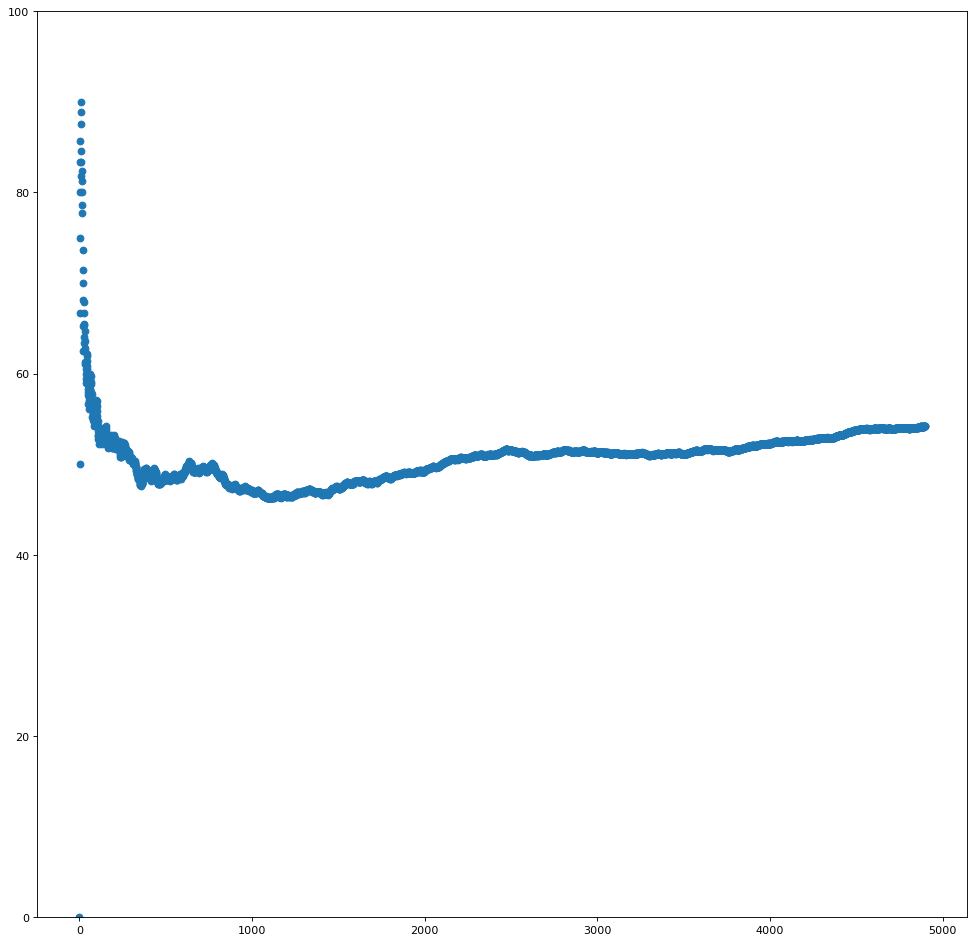

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)
ax = plt.gca()
ax.set_ylim([0, 100])
plt.scatter(*zip(*values))
plt.show()

# ADAPTIVE RANDOM FOREST CLASSIFIER (51.90%)

In [32]:
#It is necessary to reload the dataset because it was previously emptied by simulating a stream line by line
dataset = stream.iter_csv("winequality-white.csv", target="quality", converters=types)

In [33]:
from river import ensemble
model = ensemble.AdaptiveRandomForestClassifier(n_models=3, seed=42)

print("[INFO] starting training...")
metric = Accuracy()

values = []

# loop over the dataset
for (i, (X, y)) in enumerate(dataset):
    # make predictions on the current set of features, train the
    # model on the features, and then update our metric
    preds = model.predict_one(X)
    model = model.learn_one(X, y)
    metric = metric.update(y, preds)
    values.append((i, float(str(metric).split(':')[1].strip()[:-1])))
    print("[INFO] update {} - {}".format(i, metric))
    
# show the accuracy of the model
print("[INFO] final - {}".format(metric))

[INFO] starting training...
[INFO] update 0 - Accuracy: 0.00%
[INFO] update 1 - Accuracy: 50.00%
[INFO] update 2 - Accuracy: 66.67%
[INFO] update 3 - Accuracy: 75.00%
[INFO] update 4 - Accuracy: 80.00%
[INFO] update 5 - Accuracy: 83.33%
[INFO] update 6 - Accuracy: 85.71%
[INFO] update 7 - Accuracy: 87.50%
[INFO] update 8 - Accuracy: 88.89%
[INFO] update 9 - Accuracy: 90.00%
[INFO] update 10 - Accuracy: 81.82%
[INFO] update 11 - Accuracy: 75.00%
[INFO] update 12 - Accuracy: 69.23%
[INFO] update 13 - Accuracy: 64.29%
[INFO] update 14 - Accuracy: 60.00%
[INFO] update 15 - Accuracy: 56.25%
[INFO] update 16 - Accuracy: 58.82%
[INFO] update 17 - Accuracy: 55.56%
[INFO] update 18 - Accuracy: 52.63%
[INFO] update 19 - Accuracy: 50.00%
[INFO] update 20 - Accuracy: 47.62%
[INFO] update 21 - Accuracy: 45.45%
[INFO] update 22 - Accuracy: 43.48%
[INFO] update 23 - Accuracy: 41.67%
[INFO] update 24 - Accuracy: 44.00%
[INFO] update 25 - Accuracy: 46.15%
[INFO] update 26 - Accuracy: 48.15%
[INFO] upda

[INFO] update 283 - Accuracy: 50.00%
[INFO] update 284 - Accuracy: 50.18%
[INFO] update 285 - Accuracy: 50.00%
[INFO] update 286 - Accuracy: 49.83%
[INFO] update 287 - Accuracy: 49.65%
[INFO] update 288 - Accuracy: 49.83%
[INFO] update 289 - Accuracy: 50.00%
[INFO] update 290 - Accuracy: 50.17%
[INFO] update 291 - Accuracy: 50.34%
[INFO] update 292 - Accuracy: 50.17%
[INFO] update 293 - Accuracy: 50.00%
[INFO] update 294 - Accuracy: 49.83%
[INFO] update 295 - Accuracy: 50.00%
[INFO] update 296 - Accuracy: 50.17%
[INFO] update 297 - Accuracy: 50.34%
[INFO] update 298 - Accuracy: 50.50%
[INFO] update 299 - Accuracy: 50.33%
[INFO] update 300 - Accuracy: 50.17%
[INFO] update 301 - Accuracy: 50.00%
[INFO] update 302 - Accuracy: 50.17%
[INFO] update 303 - Accuracy: 50.00%
[INFO] update 304 - Accuracy: 49.84%
[INFO] update 305 - Accuracy: 50.00%
[INFO] update 306 - Accuracy: 49.84%
[INFO] update 307 - Accuracy: 50.00%
[INFO] update 308 - Accuracy: 49.84%
[INFO] update 309 - Accuracy: 49.68%
[

[INFO] update 555 - Accuracy: 46.94%
[INFO] update 556 - Accuracy: 47.04%
[INFO] update 557 - Accuracy: 47.13%
[INFO] update 558 - Accuracy: 47.05%
[INFO] update 559 - Accuracy: 47.14%
[INFO] update 560 - Accuracy: 47.06%
[INFO] update 561 - Accuracy: 46.98%
[INFO] update 562 - Accuracy: 47.07%
[INFO] update 563 - Accuracy: 46.99%
[INFO] update 564 - Accuracy: 46.90%
[INFO] update 565 - Accuracy: 47.00%
[INFO] update 566 - Accuracy: 47.09%
[INFO] update 567 - Accuracy: 47.01%
[INFO] update 568 - Accuracy: 47.10%
[INFO] update 569 - Accuracy: 47.19%
[INFO] update 570 - Accuracy: 47.29%
[INFO] update 571 - Accuracy: 47.20%
[INFO] update 572 - Accuracy: 47.12%
[INFO] update 573 - Accuracy: 47.04%
[INFO] update 574 - Accuracy: 46.96%
[INFO] update 575 - Accuracy: 47.05%
[INFO] update 576 - Accuracy: 47.14%
[INFO] update 577 - Accuracy: 47.06%
[INFO] update 578 - Accuracy: 47.15%
[INFO] update 579 - Accuracy: 47.24%
[INFO] update 580 - Accuracy: 47.33%
[INFO] update 581 - Accuracy: 47.25%
[

[INFO] update 823 - Accuracy: 47.69%
[INFO] update 824 - Accuracy: 47.64%
[INFO] update 825 - Accuracy: 47.70%
[INFO] update 826 - Accuracy: 47.76%
[INFO] update 827 - Accuracy: 47.71%
[INFO] update 828 - Accuracy: 47.65%
[INFO] update 829 - Accuracy: 47.59%
[INFO] update 830 - Accuracy: 47.65%
[INFO] update 831 - Accuracy: 47.60%
[INFO] update 832 - Accuracy: 47.54%
[INFO] update 833 - Accuracy: 47.48%
[INFO] update 834 - Accuracy: 47.54%
[INFO] update 835 - Accuracy: 47.49%
[INFO] update 836 - Accuracy: 47.43%
[INFO] update 837 - Accuracy: 47.37%
[INFO] update 838 - Accuracy: 47.32%
[INFO] update 839 - Accuracy: 47.26%
[INFO] update 840 - Accuracy: 47.32%
[INFO] update 841 - Accuracy: 47.27%
[INFO] update 842 - Accuracy: 47.21%
[INFO] update 843 - Accuracy: 47.16%
[INFO] update 844 - Accuracy: 47.10%
[INFO] update 845 - Accuracy: 47.16%
[INFO] update 846 - Accuracy: 47.11%
[INFO] update 847 - Accuracy: 47.05%
[INFO] update 848 - Accuracy: 47.00%
[INFO] update 849 - Accuracy: 47.06%
[

[INFO] update 1051 - Accuracy: 47.24%
[INFO] update 1052 - Accuracy: 47.20%
[INFO] update 1053 - Accuracy: 47.15%
[INFO] update 1054 - Accuracy: 47.11%
[INFO] update 1055 - Accuracy: 47.06%
[INFO] update 1056 - Accuracy: 47.11%
[INFO] update 1057 - Accuracy: 47.07%
[INFO] update 1058 - Accuracy: 47.12%
[INFO] update 1059 - Accuracy: 47.08%
[INFO] update 1060 - Accuracy: 47.03%
[INFO] update 1061 - Accuracy: 46.99%
[INFO] update 1062 - Accuracy: 46.94%
[INFO] update 1063 - Accuracy: 46.99%
[INFO] update 1064 - Accuracy: 47.04%
[INFO] update 1065 - Accuracy: 47.00%
[INFO] update 1066 - Accuracy: 46.95%
[INFO] update 1067 - Accuracy: 46.91%
[INFO] update 1068 - Accuracy: 46.96%
[INFO] update 1069 - Accuracy: 46.92%
[INFO] update 1070 - Accuracy: 46.87%
[INFO] update 1071 - Accuracy: 46.83%
[INFO] update 1072 - Accuracy: 46.78%
[INFO] update 1073 - Accuracy: 46.83%
[INFO] update 1074 - Accuracy: 46.79%
[INFO] update 1075 - Accuracy: 46.75%
[INFO] update 1076 - Accuracy: 46.80%
[INFO] updat

[INFO] update 1360 - Accuracy: 46.88%
[INFO] update 1361 - Accuracy: 46.84%
[INFO] update 1362 - Accuracy: 46.81%
[INFO] update 1363 - Accuracy: 46.77%
[INFO] update 1364 - Accuracy: 46.74%
[INFO] update 1365 - Accuracy: 46.71%
[INFO] update 1366 - Accuracy: 46.74%
[INFO] update 1367 - Accuracy: 46.78%
[INFO] update 1368 - Accuracy: 46.75%
[INFO] update 1369 - Accuracy: 46.72%
[INFO] update 1370 - Accuracy: 46.68%
[INFO] update 1371 - Accuracy: 46.72%
[INFO] update 1372 - Accuracy: 46.76%
[INFO] update 1373 - Accuracy: 46.80%
[INFO] update 1374 - Accuracy: 46.84%
[INFO] update 1375 - Accuracy: 46.88%
[INFO] update 1376 - Accuracy: 46.84%
[INFO] update 1377 - Accuracy: 46.88%
[INFO] update 1378 - Accuracy: 46.85%
[INFO] update 1379 - Accuracy: 46.81%
[INFO] update 1380 - Accuracy: 46.85%
[INFO] update 1381 - Accuracy: 46.89%
[INFO] update 1382 - Accuracy: 46.85%
[INFO] update 1383 - Accuracy: 46.89%
[INFO] update 1384 - Accuracy: 46.93%
[INFO] update 1385 - Accuracy: 46.90%
[INFO] updat

[INFO] update 1650 - Accuracy: 47.67%
[INFO] update 1651 - Accuracy: 47.64%
[INFO] update 1652 - Accuracy: 47.61%
[INFO] update 1653 - Accuracy: 47.58%
[INFO] update 1654 - Accuracy: 47.61%
[INFO] update 1655 - Accuracy: 47.64%
[INFO] update 1656 - Accuracy: 47.62%
[INFO] update 1657 - Accuracy: 47.59%
[INFO] update 1658 - Accuracy: 47.56%
[INFO] update 1659 - Accuracy: 47.59%
[INFO] update 1660 - Accuracy: 47.62%
[INFO] update 1661 - Accuracy: 47.65%
[INFO] update 1662 - Accuracy: 47.62%
[INFO] update 1663 - Accuracy: 47.60%
[INFO] update 1664 - Accuracy: 47.57%
[INFO] update 1665 - Accuracy: 47.54%
[INFO] update 1666 - Accuracy: 47.51%
[INFO] update 1667 - Accuracy: 47.48%
[INFO] update 1668 - Accuracy: 47.45%
[INFO] update 1669 - Accuracy: 47.49%
[INFO] update 1670 - Accuracy: 47.52%
[INFO] update 1671 - Accuracy: 47.49%
[INFO] update 1672 - Accuracy: 47.52%
[INFO] update 1673 - Accuracy: 47.55%
[INFO] update 1674 - Accuracy: 47.58%
[INFO] update 1675 - Accuracy: 47.55%
[INFO] updat

[INFO] update 1878 - Accuracy: 48.27%
[INFO] update 1879 - Accuracy: 48.24%
[INFO] update 1880 - Accuracy: 48.22%
[INFO] update 1881 - Accuracy: 48.19%
[INFO] update 1882 - Accuracy: 48.22%
[INFO] update 1883 - Accuracy: 48.25%
[INFO] update 1884 - Accuracy: 48.22%
[INFO] update 1885 - Accuracy: 48.25%
[INFO] update 1886 - Accuracy: 48.28%
[INFO] update 1887 - Accuracy: 48.25%
[INFO] update 1888 - Accuracy: 48.23%
[INFO] update 1889 - Accuracy: 48.20%
[INFO] update 1890 - Accuracy: 48.23%
[INFO] update 1891 - Accuracy: 48.26%
[INFO] update 1892 - Accuracy: 48.23%
[INFO] update 1893 - Accuracy: 48.26%
[INFO] update 1894 - Accuracy: 48.23%
[INFO] update 1895 - Accuracy: 48.21%
[INFO] update 1896 - Accuracy: 48.23%
[INFO] update 1897 - Accuracy: 48.26%
[INFO] update 1898 - Accuracy: 48.29%
[INFO] update 1899 - Accuracy: 48.32%
[INFO] update 1900 - Accuracy: 48.34%
[INFO] update 1901 - Accuracy: 48.32%
[INFO] update 1902 - Accuracy: 48.34%
[INFO] update 1903 - Accuracy: 48.32%
[INFO] updat

[INFO] update 2141 - Accuracy: 48.83%
[INFO] update 2142 - Accuracy: 48.86%
[INFO] update 2143 - Accuracy: 48.83%
[INFO] update 2144 - Accuracy: 48.86%
[INFO] update 2145 - Accuracy: 48.88%
[INFO] update 2146 - Accuracy: 48.91%
[INFO] update 2147 - Accuracy: 48.88%
[INFO] update 2148 - Accuracy: 48.91%
[INFO] update 2149 - Accuracy: 48.93%
[INFO] update 2150 - Accuracy: 48.95%
[INFO] update 2151 - Accuracy: 48.93%
[INFO] update 2152 - Accuracy: 48.95%
[INFO] update 2153 - Accuracy: 48.98%
[INFO] update 2154 - Accuracy: 48.96%
[INFO] update 2155 - Accuracy: 48.98%
[INFO] update 2156 - Accuracy: 48.96%
[INFO] update 2157 - Accuracy: 48.93%
[INFO] update 2158 - Accuracy: 48.96%
[INFO] update 2159 - Accuracy: 48.94%
[INFO] update 2160 - Accuracy: 48.91%
[INFO] update 2161 - Accuracy: 48.94%
[INFO] update 2162 - Accuracy: 48.91%
[INFO] update 2163 - Accuracy: 48.89%
[INFO] update 2164 - Accuracy: 48.87%
[INFO] update 2165 - Accuracy: 48.89%
[INFO] update 2166 - Accuracy: 48.92%
[INFO] updat

[INFO] update 2440 - Accuracy: 48.67%
[INFO] update 2441 - Accuracy: 48.65%
[INFO] update 2442 - Accuracy: 48.67%
[INFO] update 2443 - Accuracy: 48.69%
[INFO] update 2444 - Accuracy: 48.71%
[INFO] update 2445 - Accuracy: 48.73%
[INFO] update 2446 - Accuracy: 48.75%
[INFO] update 2447 - Accuracy: 48.77%
[INFO] update 2448 - Accuracy: 48.80%
[INFO] update 2449 - Accuracy: 48.82%
[INFO] update 2450 - Accuracy: 48.80%
[INFO] update 2451 - Accuracy: 48.82%
[INFO] update 2452 - Accuracy: 48.80%
[INFO] update 2453 - Accuracy: 48.82%
[INFO] update 2454 - Accuracy: 48.80%
[INFO] update 2455 - Accuracy: 48.82%
[INFO] update 2456 - Accuracy: 48.84%
[INFO] update 2457 - Accuracy: 48.86%
[INFO] update 2458 - Accuracy: 48.88%
[INFO] update 2459 - Accuracy: 48.90%
[INFO] update 2460 - Accuracy: 48.92%
[INFO] update 2461 - Accuracy: 48.94%
[INFO] update 2462 - Accuracy: 48.96%
[INFO] update 2463 - Accuracy: 48.94%
[INFO] update 2464 - Accuracy: 48.92%
[INFO] update 2465 - Accuracy: 48.95%
[INFO] updat

[INFO] update 2685 - Accuracy: 48.73%
[INFO] update 2686 - Accuracy: 48.72%
[INFO] update 2687 - Accuracy: 48.74%
[INFO] update 2688 - Accuracy: 48.75%
[INFO] update 2689 - Accuracy: 48.74%
[INFO] update 2690 - Accuracy: 48.72%
[INFO] update 2691 - Accuracy: 48.74%
[INFO] update 2692 - Accuracy: 48.72%
[INFO] update 2693 - Accuracy: 48.74%
[INFO] update 2694 - Accuracy: 48.76%
[INFO] update 2695 - Accuracy: 48.78%
[INFO] update 2696 - Accuracy: 48.76%
[INFO] update 2697 - Accuracy: 48.74%
[INFO] update 2698 - Accuracy: 48.72%
[INFO] update 2699 - Accuracy: 48.70%
[INFO] update 2700 - Accuracy: 48.72%
[INFO] update 2701 - Accuracy: 48.74%
[INFO] update 2702 - Accuracy: 48.76%
[INFO] update 2703 - Accuracy: 48.78%
[INFO] update 2704 - Accuracy: 48.76%
[INFO] update 2705 - Accuracy: 48.74%
[INFO] update 2706 - Accuracy: 48.76%
[INFO] update 2707 - Accuracy: 48.78%
[INFO] update 2708 - Accuracy: 48.80%
[INFO] update 2709 - Accuracy: 48.82%
[INFO] update 2710 - Accuracy: 48.84%
[INFO] updat

[INFO] update 2946 - Accuracy: 49.51%
[INFO] update 2947 - Accuracy: 49.53%
[INFO] update 2948 - Accuracy: 49.51%
[INFO] update 2949 - Accuracy: 49.49%
[INFO] update 2950 - Accuracy: 49.51%
[INFO] update 2951 - Accuracy: 49.49%
[INFO] update 2952 - Accuracy: 49.51%
[INFO] update 2953 - Accuracy: 49.53%
[INFO] update 2954 - Accuracy: 49.54%
[INFO] update 2955 - Accuracy: 49.53%
[INFO] update 2956 - Accuracy: 49.51%
[INFO] update 2957 - Accuracy: 49.53%
[INFO] update 2958 - Accuracy: 49.51%
[INFO] update 2959 - Accuracy: 49.53%
[INFO] update 2960 - Accuracy: 49.51%
[INFO] update 2961 - Accuracy: 49.53%
[INFO] update 2962 - Accuracy: 49.54%
[INFO] update 2963 - Accuracy: 49.56%
[INFO] update 2964 - Accuracy: 49.54%
[INFO] update 2965 - Accuracy: 49.53%
[INFO] update 2966 - Accuracy: 49.51%
[INFO] update 2967 - Accuracy: 49.49%
[INFO] update 2968 - Accuracy: 49.48%
[INFO] update 2969 - Accuracy: 49.49%
[INFO] update 2970 - Accuracy: 49.48%
[INFO] update 2971 - Accuracy: 49.50%
[INFO] updat

[INFO] update 3199 - Accuracy: 49.44%
[INFO] update 3200 - Accuracy: 49.45%
[INFO] update 3201 - Accuracy: 49.47%
[INFO] update 3202 - Accuracy: 49.45%
[INFO] update 3203 - Accuracy: 49.44%
[INFO] update 3204 - Accuracy: 49.45%
[INFO] update 3205 - Accuracy: 49.44%
[INFO] update 3206 - Accuracy: 49.42%
[INFO] update 3207 - Accuracy: 49.41%
[INFO] update 3208 - Accuracy: 49.39%
[INFO] update 3209 - Accuracy: 49.38%
[INFO] update 3210 - Accuracy: 49.39%
[INFO] update 3211 - Accuracy: 49.38%
[INFO] update 3212 - Accuracy: 49.36%
[INFO] update 3213 - Accuracy: 49.38%
[INFO] update 3214 - Accuracy: 49.36%
[INFO] update 3215 - Accuracy: 49.38%
[INFO] update 3216 - Accuracy: 49.36%
[INFO] update 3217 - Accuracy: 49.38%
[INFO] update 3218 - Accuracy: 49.36%
[INFO] update 3219 - Accuracy: 49.35%
[INFO] update 3220 - Accuracy: 49.33%
[INFO] update 3221 - Accuracy: 49.32%
[INFO] update 3222 - Accuracy: 49.33%
[INFO] update 3223 - Accuracy: 49.35%
[INFO] update 3224 - Accuracy: 49.36%
[INFO] updat

[INFO] update 3459 - Accuracy: 49.39%
[INFO] update 3460 - Accuracy: 49.41%
[INFO] update 3461 - Accuracy: 49.39%
[INFO] update 3462 - Accuracy: 49.41%
[INFO] update 3463 - Accuracy: 49.39%
[INFO] update 3464 - Accuracy: 49.41%
[INFO] update 3465 - Accuracy: 49.39%
[INFO] update 3466 - Accuracy: 49.41%
[INFO] update 3467 - Accuracy: 49.42%
[INFO] update 3468 - Accuracy: 49.41%
[INFO] update 3469 - Accuracy: 49.39%
[INFO] update 3470 - Accuracy: 49.38%
[INFO] update 3471 - Accuracy: 49.40%
[INFO] update 3472 - Accuracy: 49.38%
[INFO] update 3473 - Accuracy: 49.37%
[INFO] update 3474 - Accuracy: 49.38%
[INFO] update 3475 - Accuracy: 49.37%
[INFO] update 3476 - Accuracy: 49.35%
[INFO] update 3477 - Accuracy: 49.37%
[INFO] update 3478 - Accuracy: 49.38%
[INFO] update 3479 - Accuracy: 49.40%
[INFO] update 3480 - Accuracy: 49.38%
[INFO] update 3481 - Accuracy: 49.37%
[INFO] update 3482 - Accuracy: 49.35%
[INFO] update 3483 - Accuracy: 49.37%
[INFO] update 3484 - Accuracy: 49.35%
[INFO] updat

[INFO] update 3725 - Accuracy: 49.60%
[INFO] update 3726 - Accuracy: 49.58%
[INFO] update 3727 - Accuracy: 49.60%
[INFO] update 3728 - Accuracy: 49.58%
[INFO] update 3729 - Accuracy: 49.60%
[INFO] update 3730 - Accuracy: 49.58%
[INFO] update 3731 - Accuracy: 49.57%
[INFO] update 3732 - Accuracy: 49.58%
[INFO] update 3733 - Accuracy: 49.57%
[INFO] update 3734 - Accuracy: 49.59%
[INFO] update 3735 - Accuracy: 49.60%
[INFO] update 3736 - Accuracy: 49.59%
[INFO] update 3737 - Accuracy: 49.60%
[INFO] update 3738 - Accuracy: 49.59%
[INFO] update 3739 - Accuracy: 49.57%
[INFO] update 3740 - Accuracy: 49.59%
[INFO] update 3741 - Accuracy: 49.60%
[INFO] update 3742 - Accuracy: 49.61%
[INFO] update 3743 - Accuracy: 49.63%
[INFO] update 3744 - Accuracy: 49.64%
[INFO] update 3745 - Accuracy: 49.65%
[INFO] update 3746 - Accuracy: 49.64%
[INFO] update 3747 - Accuracy: 49.63%
[INFO] update 3748 - Accuracy: 49.61%
[INFO] update 3749 - Accuracy: 49.63%
[INFO] update 3750 - Accuracy: 49.64%
[INFO] updat

[INFO] update 4001 - Accuracy: 50.37%
[INFO] update 4002 - Accuracy: 50.39%
[INFO] update 4003 - Accuracy: 50.40%
[INFO] update 4004 - Accuracy: 50.39%
[INFO] update 4005 - Accuracy: 50.40%
[INFO] update 4006 - Accuracy: 50.41%
[INFO] update 4007 - Accuracy: 50.42%
[INFO] update 4008 - Accuracy: 50.44%
[INFO] update 4009 - Accuracy: 50.45%
[INFO] update 4010 - Accuracy: 50.46%
[INFO] update 4011 - Accuracy: 50.47%
[INFO] update 4012 - Accuracy: 50.49%
[INFO] update 4013 - Accuracy: 50.47%
[INFO] update 4014 - Accuracy: 50.46%
[INFO] update 4015 - Accuracy: 50.45%
[INFO] update 4016 - Accuracy: 50.46%
[INFO] update 4017 - Accuracy: 50.47%
[INFO] update 4018 - Accuracy: 50.49%
[INFO] update 4019 - Accuracy: 50.47%
[INFO] update 4020 - Accuracy: 50.46%
[INFO] update 4021 - Accuracy: 50.47%
[INFO] update 4022 - Accuracy: 50.48%
[INFO] update 4023 - Accuracy: 50.50%
[INFO] update 4024 - Accuracy: 50.51%
[INFO] update 4025 - Accuracy: 50.50%
[INFO] update 4026 - Accuracy: 50.51%
[INFO] updat

[INFO] update 4275 - Accuracy: 50.84%
[INFO] update 4276 - Accuracy: 50.83%
[INFO] update 4277 - Accuracy: 50.84%
[INFO] update 4278 - Accuracy: 50.83%
[INFO] update 4279 - Accuracy: 50.82%
[INFO] update 4280 - Accuracy: 50.83%
[INFO] update 4281 - Accuracy: 50.82%
[INFO] update 4282 - Accuracy: 50.81%
[INFO] update 4283 - Accuracy: 50.82%
[INFO] update 4284 - Accuracy: 50.83%
[INFO] update 4285 - Accuracy: 50.84%
[INFO] update 4286 - Accuracy: 50.85%
[INFO] update 4287 - Accuracy: 50.86%
[INFO] update 4288 - Accuracy: 50.87%
[INFO] update 4289 - Accuracy: 50.86%
[INFO] update 4290 - Accuracy: 50.85%
[INFO] update 4291 - Accuracy: 50.84%
[INFO] update 4292 - Accuracy: 50.85%
[INFO] update 4293 - Accuracy: 50.86%
[INFO] update 4294 - Accuracy: 50.85%
[INFO] update 4295 - Accuracy: 50.86%
[INFO] update 4296 - Accuracy: 50.87%
[INFO] update 4297 - Accuracy: 50.88%
[INFO] update 4298 - Accuracy: 50.90%
[INFO] update 4299 - Accuracy: 50.88%
[INFO] update 4300 - Accuracy: 50.90%
[INFO] updat

[INFO] update 4497 - Accuracy: 51.56%
[INFO] update 4498 - Accuracy: 51.54%
[INFO] update 4499 - Accuracy: 51.56%
[INFO] update 4500 - Accuracy: 51.57%
[INFO] update 4501 - Accuracy: 51.55%
[INFO] update 4502 - Accuracy: 51.57%
[INFO] update 4503 - Accuracy: 51.55%
[INFO] update 4504 - Accuracy: 51.54%
[INFO] update 4505 - Accuracy: 51.55%
[INFO] update 4506 - Accuracy: 51.56%
[INFO] update 4507 - Accuracy: 51.55%
[INFO] update 4508 - Accuracy: 51.54%
[INFO] update 4509 - Accuracy: 51.55%
[INFO] update 4510 - Accuracy: 51.56%
[INFO] update 4511 - Accuracy: 51.57%
[INFO] update 4512 - Accuracy: 51.58%
[INFO] update 4513 - Accuracy: 51.60%
[INFO] update 4514 - Accuracy: 51.61%
[INFO] update 4515 - Accuracy: 51.62%
[INFO] update 4516 - Accuracy: 51.63%
[INFO] update 4517 - Accuracy: 51.64%
[INFO] update 4518 - Accuracy: 51.65%
[INFO] update 4519 - Accuracy: 51.66%
[INFO] update 4520 - Accuracy: 51.67%
[INFO] update 4521 - Accuracy: 51.68%
[INFO] update 4522 - Accuracy: 51.69%
[INFO] updat

[INFO] update 4775 - Accuracy: 51.82%
[INFO] update 4776 - Accuracy: 51.83%
[INFO] update 4777 - Accuracy: 51.84%
[INFO] update 4778 - Accuracy: 51.85%
[INFO] update 4779 - Accuracy: 51.84%
[INFO] update 4780 - Accuracy: 51.85%
[INFO] update 4781 - Accuracy: 51.86%
[INFO] update 4782 - Accuracy: 51.87%
[INFO] update 4783 - Accuracy: 51.88%
[INFO] update 4784 - Accuracy: 51.87%
[INFO] update 4785 - Accuracy: 51.86%
[INFO] update 4786 - Accuracy: 51.85%
[INFO] update 4787 - Accuracy: 51.84%
[INFO] update 4788 - Accuracy: 51.83%
[INFO] update 4789 - Accuracy: 51.84%
[INFO] update 4790 - Accuracy: 51.85%
[INFO] update 4791 - Accuracy: 51.86%
[INFO] update 4792 - Accuracy: 51.85%
[INFO] update 4793 - Accuracy: 51.86%
[INFO] update 4794 - Accuracy: 51.85%
[INFO] update 4795 - Accuracy: 51.83%
[INFO] update 4796 - Accuracy: 51.82%
[INFO] update 4797 - Accuracy: 51.83%
[INFO] update 4798 - Accuracy: 51.84%
[INFO] update 4799 - Accuracy: 51.83%
[INFO] update 4800 - Accuracy: 51.82%
[INFO] updat

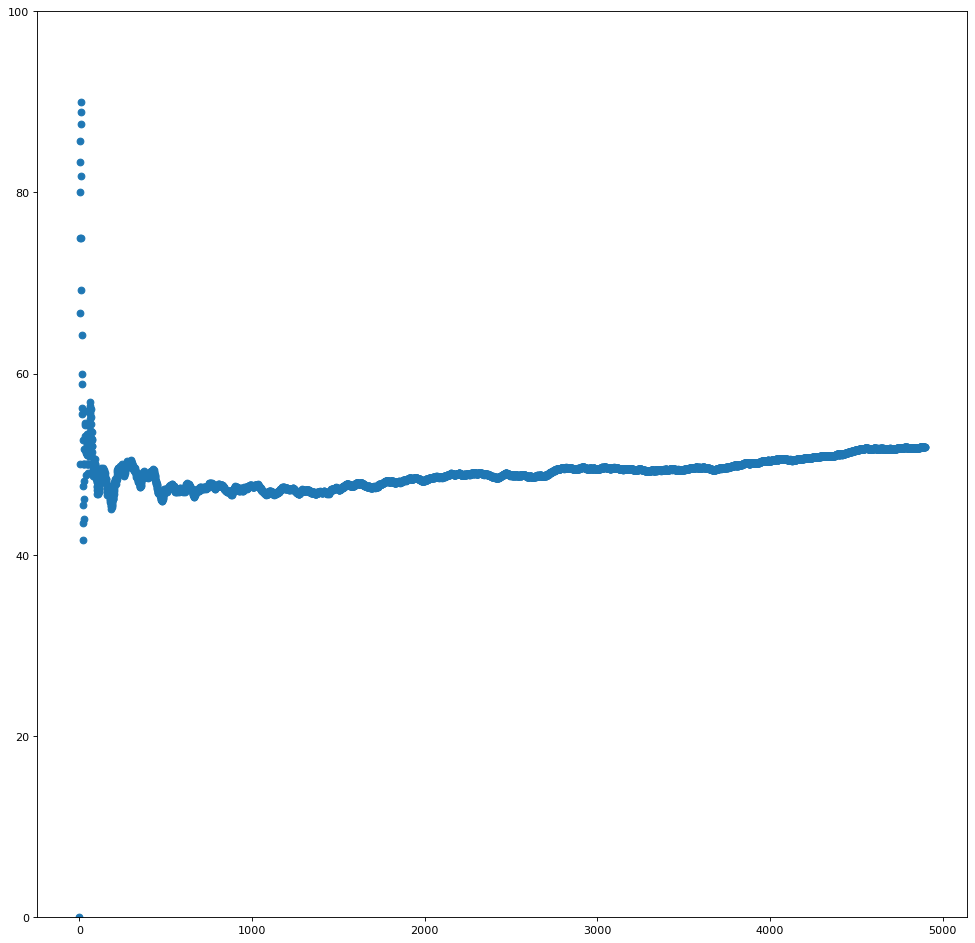

In [34]:
figure(figsize=(15, 15), dpi=80)
ax = plt.gca()
ax.set_ylim([0, 100])
plt.scatter(*zip(*values))
plt.show()

# GAUSSIAN NAIVE BAYES (42.26%)

In [35]:
#It is necessary to reload the dataset because it was previously emptied by simulating a stream line by line
dataset = stream.iter_csv("winequality-white.csv", target="quality", converters=types)

In [36]:
from river import naive_bayes
model = naive_bayes.GaussianNB()
model._multiclass

True

In [37]:
print("[INFO] starting training...")
metric = Accuracy()

values = []

# loop over the dataset
for (i, (X, y)) in enumerate(dataset):
    # make predictions on the current set of features, train the
    # model on the features, and then update our metric
    preds = model.predict_one(X)
    model = model.learn_one(X, y)
    metric = metric.update(y, preds)
    values.append((i, float(str(metric).split(':')[1].strip()[:-1])))
    print("[INFO] update {} - {}".format(i, metric))
    
# show the accuracy of the model
print("[INFO] final - {}".format(metric))

[INFO] starting training...
[INFO] update 0 - Accuracy: 0.00%
[INFO] update 1 - Accuracy: 50.00%
[INFO] update 2 - Accuracy: 66.67%
[INFO] update 3 - Accuracy: 75.00%
[INFO] update 4 - Accuracy: 80.00%
[INFO] update 5 - Accuracy: 83.33%
[INFO] update 6 - Accuracy: 85.71%
[INFO] update 7 - Accuracy: 87.50%
[INFO] update 8 - Accuracy: 88.89%
[INFO] update 9 - Accuracy: 90.00%
[INFO] update 10 - Accuracy: 81.82%
[INFO] update 11 - Accuracy: 75.00%
[INFO] update 12 - Accuracy: 69.23%
[INFO] update 13 - Accuracy: 64.29%
[INFO] update 14 - Accuracy: 60.00%
[INFO] update 15 - Accuracy: 56.25%
[INFO] update 16 - Accuracy: 58.82%
[INFO] update 17 - Accuracy: 55.56%
[INFO] update 18 - Accuracy: 52.63%
[INFO] update 19 - Accuracy: 50.00%
[INFO] update 20 - Accuracy: 47.62%
[INFO] update 21 - Accuracy: 45.45%
[INFO] update 22 - Accuracy: 43.48%
[INFO] update 23 - Accuracy: 41.67%
[INFO] update 24 - Accuracy: 44.00%
[INFO] update 25 - Accuracy: 46.15%
[INFO] update 26 - Accuracy: 48.15%
[INFO] upda

[INFO] update 225 - Accuracy: 49.12%
[INFO] update 226 - Accuracy: 49.34%
[INFO] update 227 - Accuracy: 49.12%
[INFO] update 228 - Accuracy: 49.34%
[INFO] update 229 - Accuracy: 49.57%
[INFO] update 230 - Accuracy: 49.78%
[INFO] update 231 - Accuracy: 49.57%
[INFO] update 232 - Accuracy: 49.36%
[INFO] update 233 - Accuracy: 49.15%
[INFO] update 234 - Accuracy: 48.94%
[INFO] update 235 - Accuracy: 48.73%
[INFO] update 236 - Accuracy: 48.52%
[INFO] update 237 - Accuracy: 48.32%
[INFO] update 238 - Accuracy: 48.12%
[INFO] update 239 - Accuracy: 47.92%
[INFO] update 240 - Accuracy: 48.13%
[INFO] update 241 - Accuracy: 47.93%
[INFO] update 242 - Accuracy: 48.15%
[INFO] update 243 - Accuracy: 48.36%
[INFO] update 244 - Accuracy: 48.57%
[INFO] update 245 - Accuracy: 48.37%
[INFO] update 246 - Accuracy: 48.58%
[INFO] update 247 - Accuracy: 48.79%
[INFO] update 248 - Accuracy: 49.00%
[INFO] update 249 - Accuracy: 49.20%
[INFO] update 250 - Accuracy: 49.00%
[INFO] update 251 - Accuracy: 48.81%
[

[INFO] update 524 - Accuracy: 44.76%
[INFO] update 525 - Accuracy: 44.68%
[INFO] update 526 - Accuracy: 44.59%
[INFO] update 527 - Accuracy: 44.51%
[INFO] update 528 - Accuracy: 44.42%
[INFO] update 529 - Accuracy: 44.34%
[INFO] update 530 - Accuracy: 44.44%
[INFO] update 531 - Accuracy: 44.55%
[INFO] update 532 - Accuracy: 44.47%
[INFO] update 533 - Accuracy: 44.38%
[INFO] update 534 - Accuracy: 44.30%
[INFO] update 535 - Accuracy: 44.40%
[INFO] update 536 - Accuracy: 44.51%
[INFO] update 537 - Accuracy: 44.42%
[INFO] update 538 - Accuracy: 44.34%
[INFO] update 539 - Accuracy: 44.44%
[INFO] update 540 - Accuracy: 44.36%
[INFO] update 541 - Accuracy: 44.46%
[INFO] update 542 - Accuracy: 44.38%
[INFO] update 543 - Accuracy: 44.49%
[INFO] update 544 - Accuracy: 44.40%
[INFO] update 545 - Accuracy: 44.32%
[INFO] update 546 - Accuracy: 44.42%
[INFO] update 547 - Accuracy: 44.34%
[INFO] update 548 - Accuracy: 44.44%
[INFO] update 549 - Accuracy: 44.55%
[INFO] update 550 - Accuracy: 44.46%
[

[INFO] update 879 - Accuracy: 44.89%
[INFO] update 880 - Accuracy: 44.95%
[INFO] update 881 - Accuracy: 45.01%
[INFO] update 882 - Accuracy: 44.96%
[INFO] update 883 - Accuracy: 44.91%
[INFO] update 884 - Accuracy: 44.97%
[INFO] update 885 - Accuracy: 45.03%
[INFO] update 886 - Accuracy: 44.98%
[INFO] update 887 - Accuracy: 45.05%
[INFO] update 888 - Accuracy: 44.99%
[INFO] update 889 - Accuracy: 45.06%
[INFO] update 890 - Accuracy: 45.12%
[INFO] update 891 - Accuracy: 45.18%
[INFO] update 892 - Accuracy: 45.13%
[INFO] update 893 - Accuracy: 45.19%
[INFO] update 894 - Accuracy: 45.25%
[INFO] update 895 - Accuracy: 45.20%
[INFO] update 896 - Accuracy: 45.26%
[INFO] update 897 - Accuracy: 45.21%
[INFO] update 898 - Accuracy: 45.16%
[INFO] update 899 - Accuracy: 45.22%
[INFO] update 900 - Accuracy: 45.17%
[INFO] update 901 - Accuracy: 45.23%
[INFO] update 902 - Accuracy: 45.29%
[INFO] update 903 - Accuracy: 45.24%
[INFO] update 904 - Accuracy: 45.19%
[INFO] update 905 - Accuracy: 45.14%
[

[INFO] update 1203 - Accuracy: 43.11%
[INFO] update 1204 - Accuracy: 43.07%
[INFO] update 1205 - Accuracy: 43.12%
[INFO] update 1206 - Accuracy: 43.08%
[INFO] update 1207 - Accuracy: 43.05%
[INFO] update 1208 - Accuracy: 43.01%
[INFO] update 1209 - Accuracy: 42.98%
[INFO] update 1210 - Accuracy: 42.94%
[INFO] update 1211 - Accuracy: 42.90%
[INFO] update 1212 - Accuracy: 42.87%
[INFO] update 1213 - Accuracy: 42.83%
[INFO] update 1214 - Accuracy: 42.80%
[INFO] update 1215 - Accuracy: 42.76%
[INFO] update 1216 - Accuracy: 42.73%
[INFO] update 1217 - Accuracy: 42.69%
[INFO] update 1218 - Accuracy: 42.66%
[INFO] update 1219 - Accuracy: 42.62%
[INFO] update 1220 - Accuracy: 42.67%
[INFO] update 1221 - Accuracy: 42.64%
[INFO] update 1222 - Accuracy: 42.60%
[INFO] update 1223 - Accuracy: 42.57%
[INFO] update 1224 - Accuracy: 42.61%
[INFO] update 1225 - Accuracy: 42.58%
[INFO] update 1226 - Accuracy: 42.62%
[INFO] update 1227 - Accuracy: 42.59%
[INFO] update 1228 - Accuracy: 42.55%
[INFO] updat

[INFO] update 1645 - Accuracy: 42.35%
[INFO] update 1646 - Accuracy: 42.38%
[INFO] update 1647 - Accuracy: 42.42%
[INFO] update 1648 - Accuracy: 42.39%
[INFO] update 1649 - Accuracy: 42.36%
[INFO] update 1650 - Accuracy: 42.40%
[INFO] update 1651 - Accuracy: 42.37%
[INFO] update 1652 - Accuracy: 42.35%
[INFO] update 1653 - Accuracy: 42.32%
[INFO] update 1654 - Accuracy: 42.36%
[INFO] update 1655 - Accuracy: 42.33%
[INFO] update 1656 - Accuracy: 42.31%
[INFO] update 1657 - Accuracy: 42.34%
[INFO] update 1658 - Accuracy: 42.37%
[INFO] update 1659 - Accuracy: 42.41%
[INFO] update 1660 - Accuracy: 42.38%
[INFO] update 1661 - Accuracy: 42.42%
[INFO] update 1662 - Accuracy: 42.45%
[INFO] update 1663 - Accuracy: 42.43%
[INFO] update 1664 - Accuracy: 42.40%
[INFO] update 1665 - Accuracy: 42.38%
[INFO] update 1666 - Accuracy: 42.35%
[INFO] update 1667 - Accuracy: 42.39%
[INFO] update 1668 - Accuracy: 42.42%
[INFO] update 1669 - Accuracy: 42.40%
[INFO] update 1670 - Accuracy: 42.43%
[INFO] updat

[INFO] update 1953 - Accuracy: 42.68%
[INFO] update 1954 - Accuracy: 42.71%
[INFO] update 1955 - Accuracy: 42.74%
[INFO] update 1956 - Accuracy: 42.72%
[INFO] update 1957 - Accuracy: 42.75%
[INFO] update 1958 - Accuracy: 42.73%
[INFO] update 1959 - Accuracy: 42.70%
[INFO] update 1960 - Accuracy: 42.68%
[INFO] update 1961 - Accuracy: 42.66%
[INFO] update 1962 - Accuracy: 42.64%
[INFO] update 1963 - Accuracy: 42.62%
[INFO] update 1964 - Accuracy: 42.65%
[INFO] update 1965 - Accuracy: 42.62%
[INFO] update 1966 - Accuracy: 42.65%
[INFO] update 1967 - Accuracy: 42.63%
[INFO] update 1968 - Accuracy: 42.61%
[INFO] update 1969 - Accuracy: 42.59%
[INFO] update 1970 - Accuracy: 42.57%
[INFO] update 1971 - Accuracy: 42.55%
[INFO] update 1972 - Accuracy: 42.57%
[INFO] update 1973 - Accuracy: 42.60%
[INFO] update 1974 - Accuracy: 42.63%
[INFO] update 1975 - Accuracy: 42.61%
[INFO] update 1976 - Accuracy: 42.59%
[INFO] update 1977 - Accuracy: 42.62%
[INFO] update 1978 - Accuracy: 42.60%
[INFO] updat

[INFO] update 2173 - Accuracy: 42.50%
[INFO] update 2174 - Accuracy: 42.48%
[INFO] update 2175 - Accuracy: 42.46%
[INFO] update 2176 - Accuracy: 42.49%
[INFO] update 2177 - Accuracy: 42.47%
[INFO] update 2178 - Accuracy: 42.50%
[INFO] update 2179 - Accuracy: 42.48%
[INFO] update 2180 - Accuracy: 42.46%
[INFO] update 2181 - Accuracy: 42.44%
[INFO] update 2182 - Accuracy: 42.42%
[INFO] update 2183 - Accuracy: 42.40%
[INFO] update 2184 - Accuracy: 42.43%
[INFO] update 2185 - Accuracy: 42.41%
[INFO] update 2186 - Accuracy: 42.39%
[INFO] update 2187 - Accuracy: 42.37%
[INFO] update 2188 - Accuracy: 42.39%
[INFO] update 2189 - Accuracy: 42.42%
[INFO] update 2190 - Accuracy: 42.40%
[INFO] update 2191 - Accuracy: 42.43%
[INFO] update 2192 - Accuracy: 42.45%
[INFO] update 2193 - Accuracy: 42.48%
[INFO] update 2194 - Accuracy: 42.51%
[INFO] update 2195 - Accuracy: 42.49%
[INFO] update 2196 - Accuracy: 42.47%
[INFO] update 2197 - Accuracy: 42.45%
[INFO] update 2198 - Accuracy: 42.43%
[INFO] updat

[INFO] update 2512 - Accuracy: 42.54%
[INFO] update 2513 - Accuracy: 42.52%
[INFO] update 2514 - Accuracy: 42.54%
[INFO] update 2515 - Accuracy: 42.57%
[INFO] update 2516 - Accuracy: 42.59%
[INFO] update 2517 - Accuracy: 42.57%
[INFO] update 2518 - Accuracy: 42.60%
[INFO] update 2519 - Accuracy: 42.62%
[INFO] update 2520 - Accuracy: 42.64%
[INFO] update 2521 - Accuracy: 42.66%
[INFO] update 2522 - Accuracy: 42.65%
[INFO] update 2523 - Accuracy: 42.63%
[INFO] update 2524 - Accuracy: 42.65%
[INFO] update 2525 - Accuracy: 42.64%
[INFO] update 2526 - Accuracy: 42.66%
[INFO] update 2527 - Accuracy: 42.64%
[INFO] update 2528 - Accuracy: 42.63%
[INFO] update 2529 - Accuracy: 42.65%
[INFO] update 2530 - Accuracy: 42.67%
[INFO] update 2531 - Accuracy: 42.65%
[INFO] update 2532 - Accuracy: 42.64%
[INFO] update 2533 - Accuracy: 42.62%
[INFO] update 2534 - Accuracy: 42.64%
[INFO] update 2535 - Accuracy: 42.67%
[INFO] update 2536 - Accuracy: 42.65%
[INFO] update 2537 - Accuracy: 42.63%
[INFO] updat

[INFO] update 2859 - Accuracy: 43.22%
[INFO] update 2860 - Accuracy: 43.24%
[INFO] update 2861 - Accuracy: 43.22%
[INFO] update 2862 - Accuracy: 43.21%
[INFO] update 2863 - Accuracy: 43.19%
[INFO] update 2864 - Accuracy: 43.18%
[INFO] update 2865 - Accuracy: 43.16%
[INFO] update 2866 - Accuracy: 43.18%
[INFO] update 2867 - Accuracy: 43.20%
[INFO] update 2868 - Accuracy: 43.19%
[INFO] update 2869 - Accuracy: 43.17%
[INFO] update 2870 - Accuracy: 43.19%
[INFO] update 2871 - Accuracy: 43.18%
[INFO] update 2872 - Accuracy: 43.16%
[INFO] update 2873 - Accuracy: 43.15%
[INFO] update 2874 - Accuracy: 43.13%
[INFO] update 2875 - Accuracy: 43.12%
[INFO] update 2876 - Accuracy: 43.10%
[INFO] update 2877 - Accuracy: 43.12%
[INFO] update 2878 - Accuracy: 43.11%
[INFO] update 2879 - Accuracy: 43.09%
[INFO] update 2880 - Accuracy: 43.08%
[INFO] update 2881 - Accuracy: 43.10%
[INFO] update 2882 - Accuracy: 43.08%
[INFO] update 2883 - Accuracy: 43.10%
[INFO] update 2884 - Accuracy: 43.12%
[INFO] updat

[INFO] update 3145 - Accuracy: 42.40%
[INFO] update 3146 - Accuracy: 42.39%
[INFO] update 3147 - Accuracy: 42.41%
[INFO] update 3148 - Accuracy: 42.39%
[INFO] update 3149 - Accuracy: 42.41%
[INFO] update 3150 - Accuracy: 42.40%
[INFO] update 3151 - Accuracy: 42.39%
[INFO] update 3152 - Accuracy: 42.40%
[INFO] update 3153 - Accuracy: 42.39%
[INFO] update 3154 - Accuracy: 42.38%
[INFO] update 3155 - Accuracy: 42.40%
[INFO] update 3156 - Accuracy: 42.41%
[INFO] update 3157 - Accuracy: 42.43%
[INFO] update 3158 - Accuracy: 42.45%
[INFO] update 3159 - Accuracy: 42.44%
[INFO] update 3160 - Accuracy: 42.42%
[INFO] update 3161 - Accuracy: 42.44%
[INFO] update 3162 - Accuracy: 42.46%
[INFO] update 3163 - Accuracy: 42.48%
[INFO] update 3164 - Accuracy: 42.46%
[INFO] update 3165 - Accuracy: 42.45%
[INFO] update 3166 - Accuracy: 42.44%
[INFO] update 3167 - Accuracy: 42.46%
[INFO] update 3168 - Accuracy: 42.44%
[INFO] update 3169 - Accuracy: 42.46%
[INFO] update 3170 - Accuracy: 42.48%
[INFO] updat

[INFO] update 3370 - Accuracy: 42.54%
[INFO] update 3371 - Accuracy: 42.53%
[INFO] update 3372 - Accuracy: 42.54%
[INFO] update 3373 - Accuracy: 42.56%
[INFO] update 3374 - Accuracy: 42.55%
[INFO] update 3375 - Accuracy: 42.57%
[INFO] update 3376 - Accuracy: 42.58%
[INFO] update 3377 - Accuracy: 42.60%
[INFO] update 3378 - Accuracy: 42.59%
[INFO] update 3379 - Accuracy: 42.60%
[INFO] update 3380 - Accuracy: 42.62%
[INFO] update 3381 - Accuracy: 42.61%
[INFO] update 3382 - Accuracy: 42.62%
[INFO] update 3383 - Accuracy: 42.61%
[INFO] update 3384 - Accuracy: 42.63%
[INFO] update 3385 - Accuracy: 42.62%
[INFO] update 3386 - Accuracy: 42.60%
[INFO] update 3387 - Accuracy: 42.62%
[INFO] update 3388 - Accuracy: 42.64%
[INFO] update 3389 - Accuracy: 42.65%
[INFO] update 3390 - Accuracy: 42.64%
[INFO] update 3391 - Accuracy: 42.63%
[INFO] update 3392 - Accuracy: 42.62%
[INFO] update 3393 - Accuracy: 42.60%
[INFO] update 3394 - Accuracy: 42.62%
[INFO] update 3395 - Accuracy: 42.64%
[INFO] updat

[INFO] update 3622 - Accuracy: 42.78%
[INFO] update 3623 - Accuracy: 42.77%
[INFO] update 3624 - Accuracy: 42.79%
[INFO] update 3625 - Accuracy: 42.80%
[INFO] update 3626 - Accuracy: 42.79%
[INFO] update 3627 - Accuracy: 42.81%
[INFO] update 3628 - Accuracy: 42.79%
[INFO] update 3629 - Accuracy: 42.78%
[INFO] update 3630 - Accuracy: 42.77%
[INFO] update 3631 - Accuracy: 42.76%
[INFO] update 3632 - Accuracy: 42.75%
[INFO] update 3633 - Accuracy: 42.74%
[INFO] update 3634 - Accuracy: 42.72%
[INFO] update 3635 - Accuracy: 42.71%
[INFO] update 3636 - Accuracy: 42.73%
[INFO] update 3637 - Accuracy: 42.72%
[INFO] update 3638 - Accuracy: 42.73%
[INFO] update 3639 - Accuracy: 42.75%
[INFO] update 3640 - Accuracy: 42.74%
[INFO] update 3641 - Accuracy: 42.72%
[INFO] update 3642 - Accuracy: 42.71%
[INFO] update 3643 - Accuracy: 42.70%
[INFO] update 3644 - Accuracy: 42.72%
[INFO] update 3645 - Accuracy: 42.70%
[INFO] update 3646 - Accuracy: 42.72%
[INFO] update 3647 - Accuracy: 42.74%
[INFO] updat

[INFO] update 3908 - Accuracy: 42.70%
[INFO] update 3909 - Accuracy: 42.71%
[INFO] update 3910 - Accuracy: 42.70%
[INFO] update 3911 - Accuracy: 42.69%
[INFO] update 3912 - Accuracy: 42.70%
[INFO] update 3913 - Accuracy: 42.69%
[INFO] update 3914 - Accuracy: 42.71%
[INFO] update 3915 - Accuracy: 42.70%
[INFO] update 3916 - Accuracy: 42.69%
[INFO] update 3917 - Accuracy: 42.70%
[INFO] update 3918 - Accuracy: 42.71%
[INFO] update 3919 - Accuracy: 42.70%
[INFO] update 3920 - Accuracy: 42.69%
[INFO] update 3921 - Accuracy: 42.71%
[INFO] update 3922 - Accuracy: 42.72%
[INFO] update 3923 - Accuracy: 42.71%
[INFO] update 3924 - Accuracy: 42.70%
[INFO] update 3925 - Accuracy: 42.69%
[INFO] update 3926 - Accuracy: 42.70%
[INFO] update 3927 - Accuracy: 42.69%
[INFO] update 3928 - Accuracy: 42.71%
[INFO] update 3929 - Accuracy: 42.72%
[INFO] update 3930 - Accuracy: 42.71%
[INFO] update 3931 - Accuracy: 42.70%
[INFO] update 3932 - Accuracy: 42.69%
[INFO] update 3933 - Accuracy: 42.68%
[INFO] updat

[INFO] update 4358 - Accuracy: 42.30%
[INFO] update 4359 - Accuracy: 42.29%
[INFO] update 4360 - Accuracy: 42.28%
[INFO] update 4361 - Accuracy: 42.27%
[INFO] update 4362 - Accuracy: 42.26%
[INFO] update 4363 - Accuracy: 42.28%
[INFO] update 4364 - Accuracy: 42.29%
[INFO] update 4365 - Accuracy: 42.30%
[INFO] update 4366 - Accuracy: 42.29%
[INFO] update 4367 - Accuracy: 42.31%
[INFO] update 4368 - Accuracy: 42.30%
[INFO] update 4369 - Accuracy: 42.31%
[INFO] update 4370 - Accuracy: 42.32%
[INFO] update 4371 - Accuracy: 42.31%
[INFO] update 4372 - Accuracy: 42.31%
[INFO] update 4373 - Accuracy: 42.30%
[INFO] update 4374 - Accuracy: 42.31%
[INFO] update 4375 - Accuracy: 42.30%
[INFO] update 4376 - Accuracy: 42.31%
[INFO] update 4377 - Accuracy: 42.30%
[INFO] update 4378 - Accuracy: 42.32%
[INFO] update 4379 - Accuracy: 42.33%
[INFO] update 4380 - Accuracy: 42.32%
[INFO] update 4381 - Accuracy: 42.31%
[INFO] update 4382 - Accuracy: 42.30%
[INFO] update 4383 - Accuracy: 42.29%
[INFO] updat

[INFO] update 4620 - Accuracy: 42.09%
[INFO] update 4621 - Accuracy: 42.10%
[INFO] update 4622 - Accuracy: 42.12%
[INFO] update 4623 - Accuracy: 42.11%
[INFO] update 4624 - Accuracy: 42.10%
[INFO] update 4625 - Accuracy: 42.09%
[INFO] update 4626 - Accuracy: 42.08%
[INFO] update 4627 - Accuracy: 42.07%
[INFO] update 4628 - Accuracy: 42.06%
[INFO] update 4629 - Accuracy: 42.07%
[INFO] update 4630 - Accuracy: 42.06%
[INFO] update 4631 - Accuracy: 42.08%
[INFO] update 4632 - Accuracy: 42.07%
[INFO] update 4633 - Accuracy: 42.08%
[INFO] update 4634 - Accuracy: 42.09%
[INFO] update 4635 - Accuracy: 42.08%
[INFO] update 4636 - Accuracy: 42.10%
[INFO] update 4637 - Accuracy: 42.09%
[INFO] update 4638 - Accuracy: 42.10%
[INFO] update 4639 - Accuracy: 42.09%
[INFO] update 4640 - Accuracy: 42.08%
[INFO] update 4641 - Accuracy: 42.07%
[INFO] update 4642 - Accuracy: 42.08%
[INFO] update 4643 - Accuracy: 42.10%
[INFO] update 4644 - Accuracy: 42.09%
[INFO] update 4645 - Accuracy: 42.10%
[INFO] updat

[INFO] update 4860 - Accuracy: 42.28%
[INFO] update 4861 - Accuracy: 42.27%
[INFO] update 4862 - Accuracy: 42.26%
[INFO] update 4863 - Accuracy: 42.27%
[INFO] update 4864 - Accuracy: 42.28%
[INFO] update 4865 - Accuracy: 42.27%
[INFO] update 4866 - Accuracy: 42.26%
[INFO] update 4867 - Accuracy: 42.26%
[INFO] update 4868 - Accuracy: 42.25%
[INFO] update 4869 - Accuracy: 42.26%
[INFO] update 4870 - Accuracy: 42.27%
[INFO] update 4871 - Accuracy: 42.26%
[INFO] update 4872 - Accuracy: 42.27%
[INFO] update 4873 - Accuracy: 42.27%
[INFO] update 4874 - Accuracy: 42.26%
[INFO] update 4875 - Accuracy: 42.27%
[INFO] update 4876 - Accuracy: 42.28%
[INFO] update 4877 - Accuracy: 42.27%
[INFO] update 4878 - Accuracy: 42.28%
[INFO] update 4879 - Accuracy: 42.27%
[INFO] update 4880 - Accuracy: 42.27%
[INFO] update 4881 - Accuracy: 42.28%
[INFO] update 4882 - Accuracy: 42.27%
[INFO] update 4883 - Accuracy: 42.26%
[INFO] update 4884 - Accuracy: 42.27%
[INFO] update 4885 - Accuracy: 42.26%
[INFO] updat

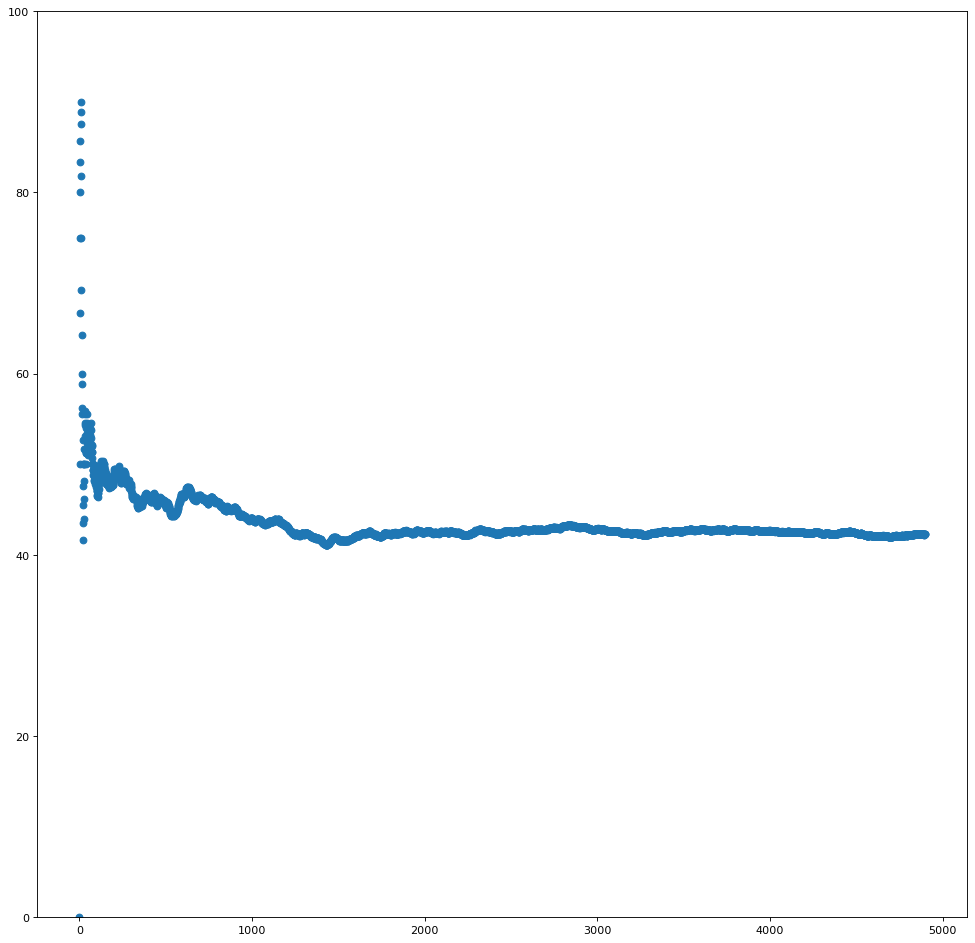

In [38]:
figure(figsize=(15, 15), dpi=80)
ax = plt.gca()
ax.set_ylim([0, 100])
plt.scatter(*zip(*values))
plt.show()

# SOFTMAX REGRESSION (42.71%)

In [39]:
#It is necessary to reload the dataset because it was previously emptied by simulating a stream line by line
dataset = stream.iter_csv("winequality-white.csv", target="quality", converters=types)

In [40]:
from river import linear_model
model = linear_model.SoftmaxRegression()
model._multiclass

True

In [41]:
print("[INFO] starting training...")
metric = Accuracy()

values = []

# loop over the dataset
for (i, (X, y)) in enumerate(dataset):
    # make predictions on the current set of features, train the
    # model on the features, and then update our metric
    preds = model.predict_one(X)
    model = model.learn_one(X, y)
    metric = metric.update(y, preds)
    values.append((i, float(str(metric).split(':')[1].strip()[:-1])))
    print("[INFO] update {} - {}".format(i, metric))
    
# show the accuracy of the model
print("[INFO] final - {}".format(metric))

[INFO] starting training...
[INFO] update 0 - Accuracy: 0.00%
[INFO] update 1 - Accuracy: 50.00%
[INFO] update 2 - Accuracy: 66.67%
[INFO] update 3 - Accuracy: 75.00%
[INFO] update 4 - Accuracy: 80.00%
[INFO] update 5 - Accuracy: 83.33%
[INFO] update 6 - Accuracy: 85.71%
[INFO] update 7 - Accuracy: 87.50%
[INFO] update 8 - Accuracy: 88.89%
[INFO] update 9 - Accuracy: 90.00%
[INFO] update 10 - Accuracy: 81.82%
[INFO] update 11 - Accuracy: 75.00%
[INFO] update 12 - Accuracy: 76.92%
[INFO] update 13 - Accuracy: 71.43%
[INFO] update 14 - Accuracy: 66.67%
[INFO] update 15 - Accuracy: 62.50%
[INFO] update 16 - Accuracy: 58.82%
[INFO] update 17 - Accuracy: 55.56%
[INFO] update 18 - Accuracy: 52.63%
[INFO] update 19 - Accuracy: 50.00%
[INFO] update 20 - Accuracy: 52.38%
[INFO] update 21 - Accuracy: 50.00%
[INFO] update 22 - Accuracy: 47.83%
[INFO] update 23 - Accuracy: 45.83%
[INFO] update 24 - Accuracy: 44.00%
[INFO] update 25 - Accuracy: 46.15%
[INFO] update 26 - Accuracy: 48.15%
[INFO] upda

[INFO] update 279 - Accuracy: 42.50%
[INFO] update 280 - Accuracy: 42.35%
[INFO] update 281 - Accuracy: 42.55%
[INFO] update 282 - Accuracy: 42.40%
[INFO] update 283 - Accuracy: 42.25%
[INFO] update 284 - Accuracy: 42.46%
[INFO] update 285 - Accuracy: 42.66%
[INFO] update 286 - Accuracy: 42.51%
[INFO] update 287 - Accuracy: 42.36%
[INFO] update 288 - Accuracy: 42.56%
[INFO] update 289 - Accuracy: 42.76%
[INFO] update 290 - Accuracy: 42.96%
[INFO] update 291 - Accuracy: 42.81%
[INFO] update 292 - Accuracy: 42.66%
[INFO] update 293 - Accuracy: 42.52%
[INFO] update 294 - Accuracy: 42.37%
[INFO] update 295 - Accuracy: 42.23%
[INFO] update 296 - Accuracy: 42.09%
[INFO] update 297 - Accuracy: 41.95%
[INFO] update 298 - Accuracy: 41.81%
[INFO] update 299 - Accuracy: 42.00%
[INFO] update 300 - Accuracy: 42.19%
[INFO] update 301 - Accuracy: 42.38%
[INFO] update 302 - Accuracy: 42.57%
[INFO] update 303 - Accuracy: 42.76%
[INFO] update 304 - Accuracy: 42.95%
[INFO] update 305 - Accuracy: 43.14%
[

[INFO] update 778 - Accuracy: 40.82%
[INFO] update 779 - Accuracy: 40.77%
[INFO] update 780 - Accuracy: 40.72%
[INFO] update 781 - Accuracy: 40.66%
[INFO] update 782 - Accuracy: 40.61%
[INFO] update 783 - Accuracy: 40.56%
[INFO] update 784 - Accuracy: 40.51%
[INFO] update 785 - Accuracy: 40.46%
[INFO] update 786 - Accuracy: 40.41%
[INFO] update 787 - Accuracy: 40.48%
[INFO] update 788 - Accuracy: 40.43%
[INFO] update 789 - Accuracy: 40.38%
[INFO] update 790 - Accuracy: 40.46%
[INFO] update 791 - Accuracy: 40.40%
[INFO] update 792 - Accuracy: 40.35%
[INFO] update 793 - Accuracy: 40.30%
[INFO] update 794 - Accuracy: 40.25%
[INFO] update 795 - Accuracy: 40.33%
[INFO] update 796 - Accuracy: 40.28%
[INFO] update 797 - Accuracy: 40.35%
[INFO] update 798 - Accuracy: 40.43%
[INFO] update 799 - Accuracy: 40.38%
[INFO] update 800 - Accuracy: 40.45%
[INFO] update 801 - Accuracy: 40.40%
[INFO] update 802 - Accuracy: 40.47%
[INFO] update 803 - Accuracy: 40.42%
[INFO] update 804 - Accuracy: 40.37%
[

[INFO] update 1188 - Accuracy: 39.36%
[INFO] update 1189 - Accuracy: 39.33%
[INFO] update 1190 - Accuracy: 39.29%
[INFO] update 1191 - Accuracy: 39.26%
[INFO] update 1192 - Accuracy: 39.23%
[INFO] update 1193 - Accuracy: 39.20%
[INFO] update 1194 - Accuracy: 39.16%
[INFO] update 1195 - Accuracy: 39.21%
[INFO] update 1196 - Accuracy: 39.18%
[INFO] update 1197 - Accuracy: 39.15%
[INFO] update 1198 - Accuracy: 39.12%
[INFO] update 1199 - Accuracy: 39.08%
[INFO] update 1200 - Accuracy: 39.05%
[INFO] update 1201 - Accuracy: 39.10%
[INFO] update 1202 - Accuracy: 39.07%
[INFO] update 1203 - Accuracy: 39.04%
[INFO] update 1204 - Accuracy: 39.00%
[INFO] update 1205 - Accuracy: 38.97%
[INFO] update 1206 - Accuracy: 38.94%
[INFO] update 1207 - Accuracy: 38.91%
[INFO] update 1208 - Accuracy: 38.88%
[INFO] update 1209 - Accuracy: 38.84%
[INFO] update 1210 - Accuracy: 38.89%
[INFO] update 1211 - Accuracy: 38.86%
[INFO] update 1212 - Accuracy: 38.83%
[INFO] update 1213 - Accuracy: 38.88%
[INFO] updat

[INFO] update 1613 - Accuracy: 38.79%
[INFO] update 1614 - Accuracy: 38.76%
[INFO] update 1615 - Accuracy: 38.80%
[INFO] update 1616 - Accuracy: 38.84%
[INFO] update 1617 - Accuracy: 38.88%
[INFO] update 1618 - Accuracy: 38.91%
[INFO] update 1619 - Accuracy: 38.89%
[INFO] update 1620 - Accuracy: 38.86%
[INFO] update 1621 - Accuracy: 38.84%
[INFO] update 1622 - Accuracy: 38.82%
[INFO] update 1623 - Accuracy: 38.85%
[INFO] update 1624 - Accuracy: 38.83%
[INFO] update 1625 - Accuracy: 38.81%
[INFO] update 1626 - Accuracy: 38.84%
[INFO] update 1627 - Accuracy: 38.82%
[INFO] update 1628 - Accuracy: 38.80%
[INFO] update 1629 - Accuracy: 38.83%
[INFO] update 1630 - Accuracy: 38.81%
[INFO] update 1631 - Accuracy: 38.79%
[INFO] update 1632 - Accuracy: 38.76%
[INFO] update 1633 - Accuracy: 38.74%
[INFO] update 1634 - Accuracy: 38.72%
[INFO] update 1635 - Accuracy: 38.75%
[INFO] update 1636 - Accuracy: 38.73%
[INFO] update 1637 - Accuracy: 38.71%
[INFO] update 1638 - Accuracy: 38.68%
[INFO] updat

[INFO] update 1978 - Accuracy: 39.16%
[INFO] update 1979 - Accuracy: 39.19%
[INFO] update 1980 - Accuracy: 39.17%
[INFO] update 1981 - Accuracy: 39.20%
[INFO] update 1982 - Accuracy: 39.23%
[INFO] update 1983 - Accuracy: 39.26%
[INFO] update 1984 - Accuracy: 39.29%
[INFO] update 1985 - Accuracy: 39.27%
[INFO] update 1986 - Accuracy: 39.31%
[INFO] update 1987 - Accuracy: 39.29%
[INFO] update 1988 - Accuracy: 39.27%
[INFO] update 1989 - Accuracy: 39.25%
[INFO] update 1990 - Accuracy: 39.28%
[INFO] update 1991 - Accuracy: 39.31%
[INFO] update 1992 - Accuracy: 39.29%
[INFO] update 1993 - Accuracy: 39.27%
[INFO] update 1994 - Accuracy: 39.30%
[INFO] update 1995 - Accuracy: 39.33%
[INFO] update 1996 - Accuracy: 39.36%
[INFO] update 1997 - Accuracy: 39.39%
[INFO] update 1998 - Accuracy: 39.42%
[INFO] update 1999 - Accuracy: 39.45%
[INFO] update 2000 - Accuracy: 39.43%
[INFO] update 2001 - Accuracy: 39.41%
[INFO] update 2002 - Accuracy: 39.39%
[INFO] update 2003 - Accuracy: 39.42%
[INFO] updat

[INFO] update 2264 - Accuracy: 39.96%
[INFO] update 2265 - Accuracy: 39.94%
[INFO] update 2266 - Accuracy: 39.96%
[INFO] update 2267 - Accuracy: 39.95%
[INFO] update 2268 - Accuracy: 39.97%
[INFO] update 2269 - Accuracy: 40.00%
[INFO] update 2270 - Accuracy: 39.98%
[INFO] update 2271 - Accuracy: 39.96%
[INFO] update 2272 - Accuracy: 39.99%
[INFO] update 2273 - Accuracy: 39.97%
[INFO] update 2274 - Accuracy: 39.96%
[INFO] update 2275 - Accuracy: 39.94%
[INFO] update 2276 - Accuracy: 39.92%
[INFO] update 2277 - Accuracy: 39.95%
[INFO] update 2278 - Accuracy: 39.97%
[INFO] update 2279 - Accuracy: 39.96%
[INFO] update 2280 - Accuracy: 39.94%
[INFO] update 2281 - Accuracy: 39.96%
[INFO] update 2282 - Accuracy: 39.95%
[INFO] update 2283 - Accuracy: 39.97%
[INFO] update 2284 - Accuracy: 40.00%
[INFO] update 2285 - Accuracy: 40.03%
[INFO] update 2286 - Accuracy: 40.05%
[INFO] update 2287 - Accuracy: 40.08%
[INFO] update 2288 - Accuracy: 40.10%
[INFO] update 2289 - Accuracy: 40.09%
[INFO] updat

[INFO] update 2587 - Accuracy: 39.99%
[INFO] update 2588 - Accuracy: 40.02%
[INFO] update 2589 - Accuracy: 40.00%
[INFO] update 2590 - Accuracy: 39.98%
[INFO] update 2591 - Accuracy: 39.97%
[INFO] update 2592 - Accuracy: 39.95%
[INFO] update 2593 - Accuracy: 39.98%
[INFO] update 2594 - Accuracy: 39.96%
[INFO] update 2595 - Accuracy: 39.98%
[INFO] update 2596 - Accuracy: 40.01%
[INFO] update 2597 - Accuracy: 40.03%
[INFO] update 2598 - Accuracy: 40.05%
[INFO] update 2599 - Accuracy: 40.04%
[INFO] update 2600 - Accuracy: 40.02%
[INFO] update 2601 - Accuracy: 40.01%
[INFO] update 2602 - Accuracy: 40.03%
[INFO] update 2603 - Accuracy: 40.02%
[INFO] update 2604 - Accuracy: 40.04%
[INFO] update 2605 - Accuracy: 40.02%
[INFO] update 2606 - Accuracy: 40.01%
[INFO] update 2607 - Accuracy: 40.03%
[INFO] update 2608 - Accuracy: 40.05%
[INFO] update 2609 - Accuracy: 40.04%
[INFO] update 2610 - Accuracy: 40.02%
[INFO] update 2611 - Accuracy: 40.05%
[INFO] update 2612 - Accuracy: 40.03%
[INFO] updat

[INFO] update 3022 - Accuracy: 40.92%
[INFO] update 3023 - Accuracy: 40.91%
[INFO] update 3024 - Accuracy: 40.89%
[INFO] update 3025 - Accuracy: 40.88%
[INFO] update 3026 - Accuracy: 40.87%
[INFO] update 3027 - Accuracy: 40.85%
[INFO] update 3028 - Accuracy: 40.84%
[INFO] update 3029 - Accuracy: 40.83%
[INFO] update 3030 - Accuracy: 40.84%
[INFO] update 3031 - Accuracy: 40.83%
[INFO] update 3032 - Accuracy: 40.82%
[INFO] update 3033 - Accuracy: 40.80%
[INFO] update 3034 - Accuracy: 40.82%
[INFO] update 3035 - Accuracy: 40.81%
[INFO] update 3036 - Accuracy: 40.80%
[INFO] update 3037 - Accuracy: 40.78%
[INFO] update 3038 - Accuracy: 40.80%
[INFO] update 3039 - Accuracy: 40.82%
[INFO] update 3040 - Accuracy: 40.81%
[INFO] update 3041 - Accuracy: 40.80%
[INFO] update 3042 - Accuracy: 40.81%
[INFO] update 3043 - Accuracy: 40.83%
[INFO] update 3044 - Accuracy: 40.85%
[INFO] update 3045 - Accuracy: 40.87%
[INFO] update 3046 - Accuracy: 40.89%
[INFO] update 3047 - Accuracy: 40.88%
[INFO] updat

[INFO] update 3433 - Accuracy: 40.91%
[INFO] update 3434 - Accuracy: 40.93%
[INFO] update 3435 - Accuracy: 40.92%
[INFO] update 3436 - Accuracy: 40.94%
[INFO] update 3437 - Accuracy: 40.92%
[INFO] update 3438 - Accuracy: 40.94%
[INFO] update 3439 - Accuracy: 40.96%
[INFO] update 3440 - Accuracy: 40.98%
[INFO] update 3441 - Accuracy: 40.99%
[INFO] update 3442 - Accuracy: 40.98%
[INFO] update 3443 - Accuracy: 40.97%
[INFO] update 3444 - Accuracy: 40.96%
[INFO] update 3445 - Accuracy: 40.95%
[INFO] update 3446 - Accuracy: 40.93%
[INFO] update 3447 - Accuracy: 40.92%
[INFO] update 3448 - Accuracy: 40.91%
[INFO] update 3449 - Accuracy: 40.90%
[INFO] update 3450 - Accuracy: 40.89%
[INFO] update 3451 - Accuracy: 40.87%
[INFO] update 3452 - Accuracy: 40.86%
[INFO] update 3453 - Accuracy: 40.88%
[INFO] update 3454 - Accuracy: 40.87%
[INFO] update 3455 - Accuracy: 40.86%
[INFO] update 3456 - Accuracy: 40.84%
[INFO] update 3457 - Accuracy: 40.83%
[INFO] update 3458 - Accuracy: 40.82%
[INFO] updat

[INFO] update 3839 - Accuracy: 40.89%
[INFO] update 3840 - Accuracy: 40.87%
[INFO] update 3841 - Accuracy: 40.89%
[INFO] update 3842 - Accuracy: 40.91%
[INFO] update 3843 - Accuracy: 40.89%
[INFO] update 3844 - Accuracy: 40.88%
[INFO] update 3845 - Accuracy: 40.90%
[INFO] update 3846 - Accuracy: 40.91%
[INFO] update 3847 - Accuracy: 40.93%
[INFO] update 3848 - Accuracy: 40.95%
[INFO] update 3849 - Accuracy: 40.94%
[INFO] update 3850 - Accuracy: 40.92%
[INFO] update 3851 - Accuracy: 40.91%
[INFO] update 3852 - Accuracy: 40.90%
[INFO] update 3853 - Accuracy: 40.89%
[INFO] update 3854 - Accuracy: 40.88%
[INFO] update 3855 - Accuracy: 40.90%
[INFO] update 3856 - Accuracy: 40.91%
[INFO] update 3857 - Accuracy: 40.93%
[INFO] update 3858 - Accuracy: 40.94%
[INFO] update 3859 - Accuracy: 40.93%
[INFO] update 3860 - Accuracy: 40.95%
[INFO] update 3861 - Accuracy: 40.94%
[INFO] update 3862 - Accuracy: 40.95%
[INFO] update 3863 - Accuracy: 40.97%
[INFO] update 3864 - Accuracy: 40.96%
[INFO] updat

[INFO] update 4278 - Accuracy: 41.65%
[INFO] update 4279 - Accuracy: 41.64%
[INFO] update 4280 - Accuracy: 41.65%
[INFO] update 4281 - Accuracy: 41.66%
[INFO] update 4282 - Accuracy: 41.68%
[INFO] update 4283 - Accuracy: 41.69%
[INFO] update 4284 - Accuracy: 41.70%
[INFO] update 4285 - Accuracy: 41.72%
[INFO] update 4286 - Accuracy: 41.73%
[INFO] update 4287 - Accuracy: 41.72%
[INFO] update 4288 - Accuracy: 41.71%
[INFO] update 4289 - Accuracy: 41.70%
[INFO] update 4290 - Accuracy: 41.69%
[INFO] update 4291 - Accuracy: 41.71%
[INFO] update 4292 - Accuracy: 41.70%
[INFO] update 4293 - Accuracy: 41.69%
[INFO] update 4294 - Accuracy: 41.70%
[INFO] update 4295 - Accuracy: 41.71%
[INFO] update 4296 - Accuracy: 41.70%
[INFO] update 4297 - Accuracy: 41.72%
[INFO] update 4298 - Accuracy: 41.71%
[INFO] update 4299 - Accuracy: 41.72%
[INFO] update 4300 - Accuracy: 41.71%
[INFO] update 4301 - Accuracy: 41.72%
[INFO] update 4302 - Accuracy: 41.72%
[INFO] update 4303 - Accuracy: 41.73%
[INFO] updat

[INFO] update 4577 - Accuracy: 42.60%
[INFO] update 4578 - Accuracy: 42.59%
[INFO] update 4579 - Accuracy: 42.58%
[INFO] update 4580 - Accuracy: 42.59%
[INFO] update 4581 - Accuracy: 42.60%
[INFO] update 4582 - Accuracy: 42.61%
[INFO] update 4583 - Accuracy: 42.63%
[INFO] update 4584 - Accuracy: 42.64%
[INFO] update 4585 - Accuracy: 42.65%
[INFO] update 4586 - Accuracy: 42.66%
[INFO] update 4587 - Accuracy: 42.68%
[INFO] update 4588 - Accuracy: 42.67%
[INFO] update 4589 - Accuracy: 42.66%
[INFO] update 4590 - Accuracy: 42.67%
[INFO] update 4591 - Accuracy: 42.68%
[INFO] update 4592 - Accuracy: 42.70%
[INFO] update 4593 - Accuracy: 42.71%
[INFO] update 4594 - Accuracy: 42.72%
[INFO] update 4595 - Accuracy: 42.73%
[INFO] update 4596 - Accuracy: 42.75%
[INFO] update 4597 - Accuracy: 42.76%
[INFO] update 4598 - Accuracy: 42.77%
[INFO] update 4599 - Accuracy: 42.76%
[INFO] update 4600 - Accuracy: 42.77%
[INFO] update 4601 - Accuracy: 42.79%
[INFO] update 4602 - Accuracy: 42.80%
[INFO] updat

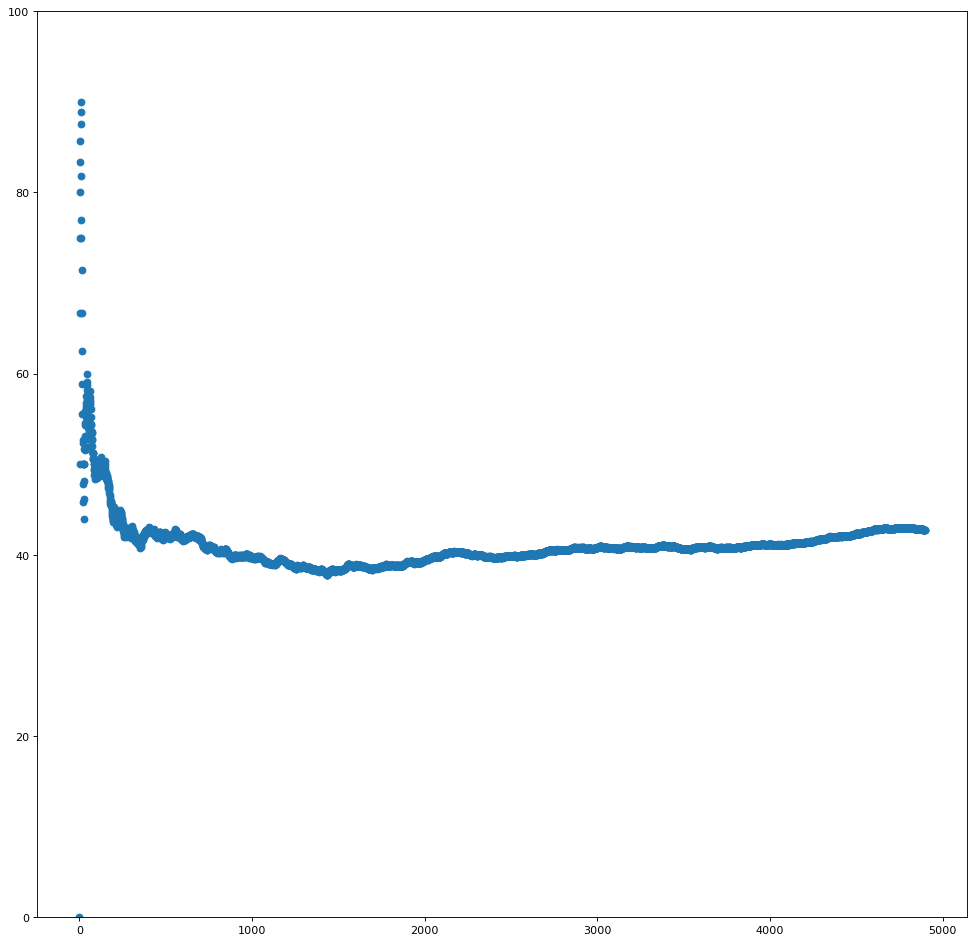

In [42]:
figure(figsize=(15, 15), dpi=80)
ax = plt.gca()
ax.set_ylim([0, 100])
plt.scatter(*zip(*values))
plt.show()

# K-NEAREST NEIGHBORS (53.27%)

In [43]:
#It is necessary to reload the dataset because it was previously emptied by simulating a stream line by line
dataset = stream.iter_csv("winequality-white.csv", target="quality", converters=types)

In [44]:
from river import neighbors
model = neighbors.KNNClassifier()
model._multiclass

True

In [45]:
print("[INFO] starting training...")
metric = Accuracy()

values = []

# loop over the dataset
for (i, (X, y)) in enumerate(dataset):
    # make predictions on the current set of features, train the
    # model on the features, and then update our metric
    preds = model.predict_one(X)
    model = model.learn_one(X, y)
    metric = metric.update(y, preds)
    values.append((i, float(str(metric).split(':')[1].strip()[:-1])))
    print("[INFO] update {} - {}".format(i, metric))
    
# show the accuracy of the model
print("[INFO] final - {}".format(metric))

[INFO] starting training...
[INFO] update 0 - Accuracy: 0.00%
[INFO] update 1 - Accuracy: 50.00%
[INFO] update 2 - Accuracy: 66.67%
[INFO] update 3 - Accuracy: 75.00%
[INFO] update 4 - Accuracy: 80.00%
[INFO] update 5 - Accuracy: 83.33%
[INFO] update 6 - Accuracy: 85.71%
[INFO] update 7 - Accuracy: 87.50%
[INFO] update 8 - Accuracy: 88.89%
[INFO] update 9 - Accuracy: 90.00%
[INFO] update 10 - Accuracy: 81.82%
[INFO] update 11 - Accuracy: 75.00%
[INFO] update 12 - Accuracy: 76.92%
[INFO] update 13 - Accuracy: 71.43%
[INFO] update 14 - Accuracy: 66.67%
[INFO] update 15 - Accuracy: 62.50%
[INFO] update 16 - Accuracy: 64.71%
[INFO] update 17 - Accuracy: 61.11%
[INFO] update 18 - Accuracy: 63.16%
[INFO] update 19 - Accuracy: 60.00%
[INFO] update 20 - Accuracy: 61.90%
[INFO] update 21 - Accuracy: 59.09%
[INFO] update 22 - Accuracy: 56.52%
[INFO] update 23 - Accuracy: 54.17%
[INFO] update 24 - Accuracy: 56.00%
[INFO] update 25 - Accuracy: 57.69%
[INFO] update 26 - Accuracy: 59.26%
[INFO] upda

[INFO] update 402 - Accuracy: 47.64%
[INFO] update 403 - Accuracy: 47.52%
[INFO] update 404 - Accuracy: 47.65%
[INFO] update 405 - Accuracy: 47.78%
[INFO] update 406 - Accuracy: 47.91%
[INFO] update 407 - Accuracy: 47.79%
[INFO] update 408 - Accuracy: 47.92%
[INFO] update 409 - Accuracy: 48.05%
[INFO] update 410 - Accuracy: 47.93%
[INFO] update 411 - Accuracy: 47.82%
[INFO] update 412 - Accuracy: 47.94%
[INFO] update 413 - Accuracy: 48.07%
[INFO] update 414 - Accuracy: 48.19%
[INFO] update 415 - Accuracy: 48.32%
[INFO] update 416 - Accuracy: 48.44%
[INFO] update 417 - Accuracy: 48.56%
[INFO] update 418 - Accuracy: 48.69%
[INFO] update 419 - Accuracy: 48.81%
[INFO] update 420 - Accuracy: 48.69%
[INFO] update 421 - Accuracy: 48.82%
[INFO] update 422 - Accuracy: 48.94%
[INFO] update 423 - Accuracy: 49.06%
[INFO] update 424 - Accuracy: 48.94%
[INFO] update 425 - Accuracy: 49.06%
[INFO] update 426 - Accuracy: 49.18%
[INFO] update 427 - Accuracy: 49.07%
[INFO] update 428 - Accuracy: 48.95%
[

[INFO] update 733 - Accuracy: 51.09%
[INFO] update 734 - Accuracy: 51.02%
[INFO] update 735 - Accuracy: 51.09%
[INFO] update 736 - Accuracy: 51.15%
[INFO] update 737 - Accuracy: 51.22%
[INFO] update 738 - Accuracy: 51.15%
[INFO] update 739 - Accuracy: 51.22%
[INFO] update 740 - Accuracy: 51.15%
[INFO] update 741 - Accuracy: 51.08%
[INFO] update 742 - Accuracy: 51.01%
[INFO] update 743 - Accuracy: 51.08%
[INFO] update 744 - Accuracy: 51.01%
[INFO] update 745 - Accuracy: 50.94%
[INFO] update 746 - Accuracy: 51.00%
[INFO] update 747 - Accuracy: 51.07%
[INFO] update 748 - Accuracy: 51.13%
[INFO] update 749 - Accuracy: 51.20%
[INFO] update 750 - Accuracy: 51.26%
[INFO] update 751 - Accuracy: 51.20%
[INFO] update 752 - Accuracy: 51.26%
[INFO] update 753 - Accuracy: 51.33%
[INFO] update 754 - Accuracy: 51.39%
[INFO] update 755 - Accuracy: 51.32%
[INFO] update 756 - Accuracy: 51.25%
[INFO] update 757 - Accuracy: 51.19%
[INFO] update 758 - Accuracy: 51.25%
[INFO] update 759 - Accuracy: 51.32%
[

[INFO] update 974 - Accuracy: 50.15%
[INFO] update 975 - Accuracy: 50.10%
[INFO] update 976 - Accuracy: 50.05%
[INFO] update 977 - Accuracy: 50.00%
[INFO] update 978 - Accuracy: 49.95%
[INFO] update 979 - Accuracy: 49.90%
[INFO] update 980 - Accuracy: 49.85%
[INFO] update 981 - Accuracy: 49.90%
[INFO] update 982 - Accuracy: 49.85%
[INFO] update 983 - Accuracy: 49.90%
[INFO] update 984 - Accuracy: 49.95%
[INFO] update 985 - Accuracy: 50.00%
[INFO] update 986 - Accuracy: 49.95%
[INFO] update 987 - Accuracy: 49.90%
[INFO] update 988 - Accuracy: 49.95%
[INFO] update 989 - Accuracy: 50.00%
[INFO] update 990 - Accuracy: 50.05%
[INFO] update 991 - Accuracy: 50.00%
[INFO] update 992 - Accuracy: 49.95%
[INFO] update 993 - Accuracy: 49.90%
[INFO] update 994 - Accuracy: 49.85%
[INFO] update 995 - Accuracy: 49.90%
[INFO] update 996 - Accuracy: 49.95%
[INFO] update 997 - Accuracy: 49.90%
[INFO] update 998 - Accuracy: 49.85%
[INFO] update 999 - Accuracy: 49.80%
[INFO] update 1000 - Accuracy: 49.75%


[INFO] update 1306 - Accuracy: 50.04%
[INFO] update 1307 - Accuracy: 50.08%
[INFO] update 1308 - Accuracy: 50.04%
[INFO] update 1309 - Accuracy: 50.08%
[INFO] update 1310 - Accuracy: 50.11%
[INFO] update 1311 - Accuracy: 50.15%
[INFO] update 1312 - Accuracy: 50.11%
[INFO] update 1313 - Accuracy: 50.15%
[INFO] update 1314 - Accuracy: 50.11%
[INFO] update 1315 - Accuracy: 50.08%
[INFO] update 1316 - Accuracy: 50.11%
[INFO] update 1317 - Accuracy: 50.15%
[INFO] update 1318 - Accuracy: 50.19%
[INFO] update 1319 - Accuracy: 50.23%
[INFO] update 1320 - Accuracy: 50.26%
[INFO] update 1321 - Accuracy: 50.30%
[INFO] update 1322 - Accuracy: 50.34%
[INFO] update 1323 - Accuracy: 50.30%
[INFO] update 1324 - Accuracy: 50.26%
[INFO] update 1325 - Accuracy: 50.30%
[INFO] update 1326 - Accuracy: 50.34%
[INFO] update 1327 - Accuracy: 50.30%
[INFO] update 1328 - Accuracy: 50.34%
[INFO] update 1329 - Accuracy: 50.30%
[INFO] update 1330 - Accuracy: 50.34%
[INFO] update 1331 - Accuracy: 50.30%
[INFO] updat

[INFO] update 1608 - Accuracy: 49.22%
[INFO] update 1609 - Accuracy: 49.19%
[INFO] update 1610 - Accuracy: 49.22%
[INFO] update 1611 - Accuracy: 49.26%
[INFO] update 1612 - Accuracy: 49.29%
[INFO] update 1613 - Accuracy: 49.32%
[INFO] update 1614 - Accuracy: 49.35%
[INFO] update 1615 - Accuracy: 49.38%
[INFO] update 1616 - Accuracy: 49.35%
[INFO] update 1617 - Accuracy: 49.38%
[INFO] update 1618 - Accuracy: 49.41%
[INFO] update 1619 - Accuracy: 49.38%
[INFO] update 1620 - Accuracy: 49.41%
[INFO] update 1621 - Accuracy: 49.45%
[INFO] update 1622 - Accuracy: 49.41%
[INFO] update 1623 - Accuracy: 49.38%
[INFO] update 1624 - Accuracy: 49.35%
[INFO] update 1625 - Accuracy: 49.32%
[INFO] update 1626 - Accuracy: 49.35%
[INFO] update 1627 - Accuracy: 49.39%
[INFO] update 1628 - Accuracy: 49.36%
[INFO] update 1629 - Accuracy: 49.39%
[INFO] update 1630 - Accuracy: 49.36%
[INFO] update 1631 - Accuracy: 49.39%
[INFO] update 1632 - Accuracy: 49.36%
[INFO] update 1633 - Accuracy: 49.33%
[INFO] updat

[INFO] update 1917 - Accuracy: 49.84%
[INFO] update 1918 - Accuracy: 49.87%
[INFO] update 1919 - Accuracy: 49.90%
[INFO] update 1920 - Accuracy: 49.87%
[INFO] update 1921 - Accuracy: 49.90%
[INFO] update 1922 - Accuracy: 49.87%
[INFO] update 1923 - Accuracy: 49.84%
[INFO] update 1924 - Accuracy: 49.87%
[INFO] update 1925 - Accuracy: 49.90%
[INFO] update 1926 - Accuracy: 49.92%
[INFO] update 1927 - Accuracy: 49.90%
[INFO] update 1928 - Accuracy: 49.92%
[INFO] update 1929 - Accuracy: 49.90%
[INFO] update 1930 - Accuracy: 49.92%
[INFO] update 1931 - Accuracy: 49.90%
[INFO] update 1932 - Accuracy: 49.87%
[INFO] update 1933 - Accuracy: 49.84%
[INFO] update 1934 - Accuracy: 49.82%
[INFO] update 1935 - Accuracy: 49.85%
[INFO] update 1936 - Accuracy: 49.87%
[INFO] update 1937 - Accuracy: 49.85%
[INFO] update 1938 - Accuracy: 49.82%
[INFO] update 1939 - Accuracy: 49.79%
[INFO] update 1940 - Accuracy: 49.82%
[INFO] update 1941 - Accuracy: 49.85%
[INFO] update 1942 - Accuracy: 49.87%
[INFO] updat

[INFO] update 2219 - Accuracy: 50.59%
[INFO] update 2220 - Accuracy: 50.56%
[INFO] update 2221 - Accuracy: 50.59%
[INFO] update 2222 - Accuracy: 50.56%
[INFO] update 2223 - Accuracy: 50.58%
[INFO] update 2224 - Accuracy: 50.61%
[INFO] update 2225 - Accuracy: 50.58%
[INFO] update 2226 - Accuracy: 50.61%
[INFO] update 2227 - Accuracy: 50.63%
[INFO] update 2228 - Accuracy: 50.61%
[INFO] update 2229 - Accuracy: 50.63%
[INFO] update 2230 - Accuracy: 50.65%
[INFO] update 2231 - Accuracy: 50.67%
[INFO] update 2232 - Accuracy: 50.65%
[INFO] update 2233 - Accuracy: 50.63%
[INFO] update 2234 - Accuracy: 50.60%
[INFO] update 2235 - Accuracy: 50.58%
[INFO] update 2236 - Accuracy: 50.56%
[INFO] update 2237 - Accuracy: 50.54%
[INFO] update 2238 - Accuracy: 50.56%
[INFO] update 2239 - Accuracy: 50.58%
[INFO] update 2240 - Accuracy: 50.56%
[INFO] update 2241 - Accuracy: 50.58%
[INFO] update 2242 - Accuracy: 50.56%
[INFO] update 2243 - Accuracy: 50.53%
[INFO] update 2244 - Accuracy: 50.51%
[INFO] updat

[INFO] update 2509 - Accuracy: 49.96%
[INFO] update 2510 - Accuracy: 49.94%
[INFO] update 2511 - Accuracy: 49.96%
[INFO] update 2512 - Accuracy: 49.98%
[INFO] update 2513 - Accuracy: 49.96%
[INFO] update 2514 - Accuracy: 49.94%
[INFO] update 2515 - Accuracy: 49.92%
[INFO] update 2516 - Accuracy: 49.90%
[INFO] update 2517 - Accuracy: 49.88%
[INFO] update 2518 - Accuracy: 49.90%
[INFO] update 2519 - Accuracy: 49.88%
[INFO] update 2520 - Accuracy: 49.86%
[INFO] update 2521 - Accuracy: 49.88%
[INFO] update 2522 - Accuracy: 49.86%
[INFO] update 2523 - Accuracy: 49.84%
[INFO] update 2524 - Accuracy: 49.86%
[INFO] update 2525 - Accuracy: 49.88%
[INFO] update 2526 - Accuracy: 49.90%
[INFO] update 2527 - Accuracy: 49.92%
[INFO] update 2528 - Accuracy: 49.94%
[INFO] update 2529 - Accuracy: 49.92%
[INFO] update 2530 - Accuracy: 49.94%
[INFO] update 2531 - Accuracy: 49.92%
[INFO] update 2532 - Accuracy: 49.94%
[INFO] update 2533 - Accuracy: 49.92%
[INFO] update 2534 - Accuracy: 49.90%
[INFO] updat

[INFO] update 2822 - Accuracy: 50.69%
[INFO] update 2823 - Accuracy: 50.67%
[INFO] update 2824 - Accuracy: 50.65%
[INFO] update 2825 - Accuracy: 50.64%
[INFO] update 2826 - Accuracy: 50.62%
[INFO] update 2827 - Accuracy: 50.60%
[INFO] update 2828 - Accuracy: 50.62%
[INFO] update 2829 - Accuracy: 50.64%
[INFO] update 2830 - Accuracy: 50.62%
[INFO] update 2831 - Accuracy: 50.64%
[INFO] update 2832 - Accuracy: 50.62%
[INFO] update 2833 - Accuracy: 50.60%
[INFO] update 2834 - Accuracy: 50.62%
[INFO] update 2835 - Accuracy: 50.63%
[INFO] update 2836 - Accuracy: 50.65%
[INFO] update 2837 - Accuracy: 50.67%
[INFO] update 2838 - Accuracy: 50.69%
[INFO] update 2839 - Accuracy: 50.67%
[INFO] update 2840 - Accuracy: 50.69%
[INFO] update 2841 - Accuracy: 50.70%
[INFO] update 2842 - Accuracy: 50.72%
[INFO] update 2843 - Accuracy: 50.74%
[INFO] update 2844 - Accuracy: 50.72%
[INFO] update 2845 - Accuracy: 50.70%
[INFO] update 2846 - Accuracy: 50.72%
[INFO] update 2847 - Accuracy: 50.70%
[INFO] updat

[INFO] update 3102 - Accuracy: 50.60%
[INFO] update 3103 - Accuracy: 50.61%
[INFO] update 3104 - Accuracy: 50.63%
[INFO] update 3105 - Accuracy: 50.64%
[INFO] update 3106 - Accuracy: 50.66%
[INFO] update 3107 - Accuracy: 50.68%
[INFO] update 3108 - Accuracy: 50.69%
[INFO] update 3109 - Accuracy: 50.68%
[INFO] update 3110 - Accuracy: 50.66%
[INFO] update 3111 - Accuracy: 50.64%
[INFO] update 3112 - Accuracy: 50.66%
[INFO] update 3113 - Accuracy: 50.64%
[INFO] update 3114 - Accuracy: 50.63%
[INFO] update 3115 - Accuracy: 50.64%
[INFO] update 3116 - Accuracy: 50.66%
[INFO] update 3117 - Accuracy: 50.67%
[INFO] update 3118 - Accuracy: 50.66%
[INFO] update 3119 - Accuracy: 50.64%
[INFO] update 3120 - Accuracy: 50.62%
[INFO] update 3121 - Accuracy: 50.64%
[INFO] update 3122 - Accuracy: 50.66%
[INFO] update 3123 - Accuracy: 50.64%
[INFO] update 3124 - Accuracy: 50.66%
[INFO] update 3125 - Accuracy: 50.64%
[INFO] update 3126 - Accuracy: 50.62%
[INFO] update 3127 - Accuracy: 50.61%
[INFO] updat

[INFO] update 3446 - Accuracy: 50.74%
[INFO] update 3447 - Accuracy: 50.73%
[INFO] update 3448 - Accuracy: 50.71%
[INFO] update 3449 - Accuracy: 50.72%
[INFO] update 3450 - Accuracy: 50.71%
[INFO] update 3451 - Accuracy: 50.72%
[INFO] update 3452 - Accuracy: 50.74%
[INFO] update 3453 - Accuracy: 50.75%
[INFO] update 3454 - Accuracy: 50.74%
[INFO] update 3455 - Accuracy: 50.72%
[INFO] update 3456 - Accuracy: 50.74%
[INFO] update 3457 - Accuracy: 50.72%
[INFO] update 3458 - Accuracy: 50.71%
[INFO] update 3459 - Accuracy: 50.72%
[INFO] update 3460 - Accuracy: 50.71%
[INFO] update 3461 - Accuracy: 50.72%
[INFO] update 3462 - Accuracy: 50.74%
[INFO] update 3463 - Accuracy: 50.75%
[INFO] update 3464 - Accuracy: 50.76%
[INFO] update 3465 - Accuracy: 50.78%
[INFO] update 3466 - Accuracy: 50.79%
[INFO] update 3467 - Accuracy: 50.78%
[INFO] update 3468 - Accuracy: 50.76%
[INFO] update 3469 - Accuracy: 50.78%
[INFO] update 3470 - Accuracy: 50.79%
[INFO] update 3471 - Accuracy: 50.81%
[INFO] updat

[INFO] update 3740 - Accuracy: 51.16%
[INFO] update 3741 - Accuracy: 51.18%
[INFO] update 3742 - Accuracy: 51.19%
[INFO] update 3743 - Accuracy: 51.20%
[INFO] update 3744 - Accuracy: 51.21%
[INFO] update 3745 - Accuracy: 51.23%
[INFO] update 3746 - Accuracy: 51.21%
[INFO] update 3747 - Accuracy: 51.20%
[INFO] update 3748 - Accuracy: 51.19%
[INFO] update 3749 - Accuracy: 51.17%
[INFO] update 3750 - Accuracy: 51.19%
[INFO] update 3751 - Accuracy: 51.20%
[INFO] update 3752 - Accuracy: 51.21%
[INFO] update 3753 - Accuracy: 51.23%
[INFO] update 3754 - Accuracy: 51.21%
[INFO] update 3755 - Accuracy: 51.22%
[INFO] update 3756 - Accuracy: 51.24%
[INFO] update 3757 - Accuracy: 51.25%
[INFO] update 3758 - Accuracy: 51.26%
[INFO] update 3759 - Accuracy: 51.28%
[INFO] update 3760 - Accuracy: 51.29%
[INFO] update 3761 - Accuracy: 51.28%
[INFO] update 3762 - Accuracy: 51.26%
[INFO] update 3763 - Accuracy: 51.25%
[INFO] update 3764 - Accuracy: 51.26%
[INFO] update 3765 - Accuracy: 51.27%
[INFO] updat

[INFO] update 4038 - Accuracy: 52.04%
[INFO] update 4039 - Accuracy: 52.03%
[INFO] update 4040 - Accuracy: 52.04%
[INFO] update 4041 - Accuracy: 52.05%
[INFO] update 4042 - Accuracy: 52.04%
[INFO] update 4043 - Accuracy: 52.05%
[INFO] update 4044 - Accuracy: 52.06%
[INFO] update 4045 - Accuracy: 52.08%
[INFO] update 4046 - Accuracy: 52.09%
[INFO] update 4047 - Accuracy: 52.08%
[INFO] update 4048 - Accuracy: 52.09%
[INFO] update 4049 - Accuracy: 52.10%
[INFO] update 4050 - Accuracy: 52.11%
[INFO] update 4051 - Accuracy: 52.12%
[INFO] update 4052 - Accuracy: 52.13%
[INFO] update 4053 - Accuracy: 52.15%
[INFO] update 4054 - Accuracy: 52.16%
[INFO] update 4055 - Accuracy: 52.17%
[INFO] update 4056 - Accuracy: 52.16%
[INFO] update 4057 - Accuracy: 52.17%
[INFO] update 4058 - Accuracy: 52.18%
[INFO] update 4059 - Accuracy: 52.19%
[INFO] update 4060 - Accuracy: 52.18%
[INFO] update 4061 - Accuracy: 52.19%
[INFO] update 4062 - Accuracy: 52.18%
[INFO] update 4063 - Accuracy: 52.17%
[INFO] updat

[INFO] update 4307 - Accuracy: 52.37%
[INFO] update 4308 - Accuracy: 52.38%
[INFO] update 4309 - Accuracy: 52.39%
[INFO] update 4310 - Accuracy: 52.38%
[INFO] update 4311 - Accuracy: 52.39%
[INFO] update 4312 - Accuracy: 52.40%
[INFO] update 4313 - Accuracy: 52.41%
[INFO] update 4314 - Accuracy: 52.40%
[INFO] update 4315 - Accuracy: 52.39%
[INFO] update 4316 - Accuracy: 52.40%
[INFO] update 4317 - Accuracy: 52.39%
[INFO] update 4318 - Accuracy: 52.40%
[INFO] update 4319 - Accuracy: 52.41%
[INFO] update 4320 - Accuracy: 52.42%
[INFO] update 4321 - Accuracy: 52.43%
[INFO] update 4322 - Accuracy: 52.44%
[INFO] update 4323 - Accuracy: 52.45%
[INFO] update 4324 - Accuracy: 52.44%
[INFO] update 4325 - Accuracy: 52.45%
[INFO] update 4326 - Accuracy: 52.44%
[INFO] update 4327 - Accuracy: 52.45%
[INFO] update 4328 - Accuracy: 52.44%
[INFO] update 4329 - Accuracy: 52.45%
[INFO] update 4330 - Accuracy: 52.46%
[INFO] update 4331 - Accuracy: 52.47%
[INFO] update 4332 - Accuracy: 52.46%
[INFO] updat

[INFO] update 4599 - Accuracy: 52.98%
[INFO] update 4600 - Accuracy: 52.97%
[INFO] update 4601 - Accuracy: 52.96%
[INFO] update 4602 - Accuracy: 52.97%
[INFO] update 4603 - Accuracy: 52.95%
[INFO] update 4604 - Accuracy: 52.96%
[INFO] update 4605 - Accuracy: 52.97%
[INFO] update 4606 - Accuracy: 52.96%
[INFO] update 4607 - Accuracy: 52.97%
[INFO] update 4608 - Accuracy: 52.96%
[INFO] update 4609 - Accuracy: 52.95%
[INFO] update 4610 - Accuracy: 52.96%
[INFO] update 4611 - Accuracy: 52.95%
[INFO] update 4612 - Accuracy: 52.96%
[INFO] update 4613 - Accuracy: 52.95%
[INFO] update 4614 - Accuracy: 52.94%
[INFO] update 4615 - Accuracy: 52.92%
[INFO] update 4616 - Accuracy: 52.91%
[INFO] update 4617 - Accuracy: 52.90%
[INFO] update 4618 - Accuracy: 52.91%
[INFO] update 4619 - Accuracy: 52.90%
[INFO] update 4620 - Accuracy: 52.91%
[INFO] update 4621 - Accuracy: 52.90%
[INFO] update 4622 - Accuracy: 52.89%
[INFO] update 4623 - Accuracy: 52.90%
[INFO] update 4624 - Accuracy: 52.91%
[INFO] updat

[INFO] update 4884 - Accuracy: 53.22%
[INFO] update 4885 - Accuracy: 53.23%
[INFO] update 4886 - Accuracy: 53.24%
[INFO] update 4887 - Accuracy: 53.23%
[INFO] update 4888 - Accuracy: 53.22%
[INFO] update 4889 - Accuracy: 53.23%
[INFO] update 4890 - Accuracy: 53.24%
[INFO] update 4891 - Accuracy: 53.25%
[INFO] update 4892 - Accuracy: 53.24%
[INFO] update 4893 - Accuracy: 53.25%
[INFO] update 4894 - Accuracy: 53.26%
[INFO] update 4895 - Accuracy: 53.27%
[INFO] update 4896 - Accuracy: 53.26%
[INFO] update 4897 - Accuracy: 53.27%
[INFO] final - Accuracy: 53.27%


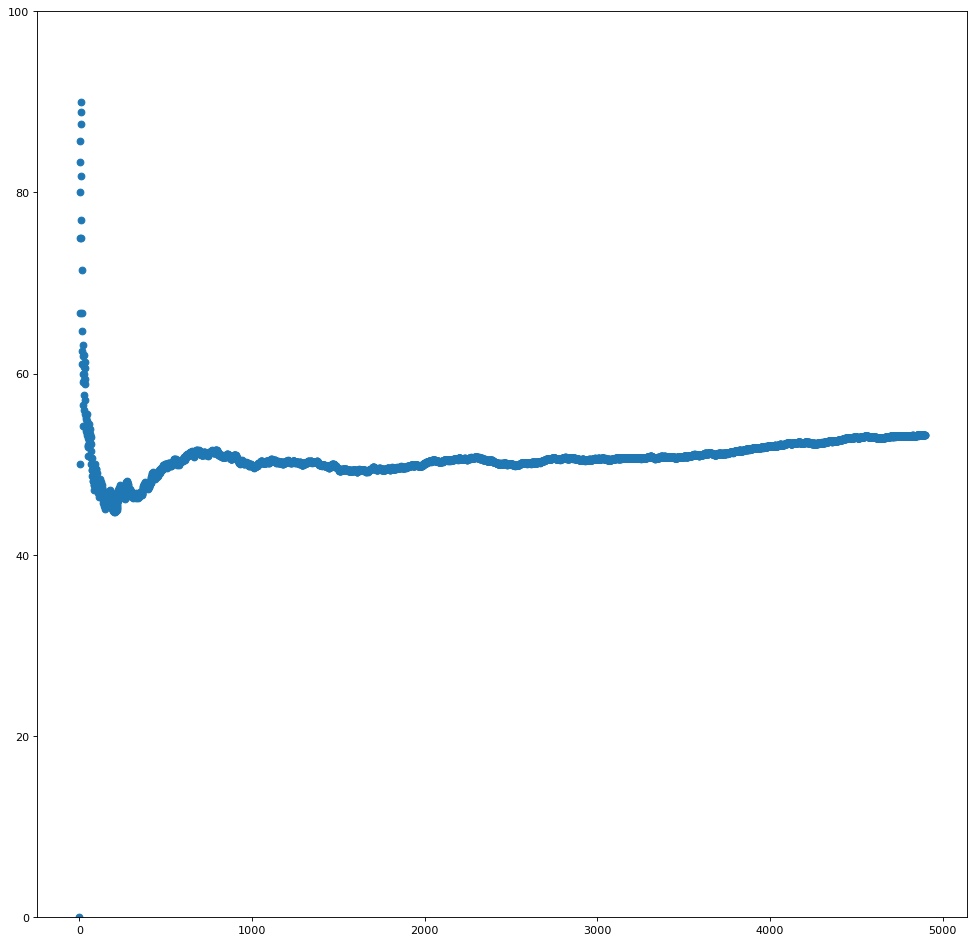

In [46]:
figure(figsize=(15, 15), dpi=80)
ax = plt.gca()
ax.set_ylim([0, 100])
plt.scatter(*zip(*values))
plt.show()

# SVM - SGDCLASSIFIER (42.13%)

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

chunksize = 1
model = SGDClassifier(loss='hinge', penalty="l2")

features_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

def acc(try_n, accuracy_score):
    return accuracy_score/try_n*100
    
data = pd.read_csv("winequality-white.csv")
print(np.unique(data['quality']))

tent = 0
acc_cumul_score = 0
values = []

for df in pd.read_csv("winequality-white.csv", chunksize=chunksize, iterator=True):
    if tent == 0:
        X = df[features_columns]
        y = df['quality']
        model.partial_fit(X, y, classes=np.unique(data['quality']))
        predictions = model.predict(X)
        accuracy = accuracy_score(y, predictions)
        acc_cumul_score += accuracy
        tent += 1
        values.append((tent, acc(tent, acc_cumul_score)))
        print('Accuracy: {}'.format(acc(tent, acc_cumul_score)))

    else:
        X = df[features_columns]
        y = df['quality']
        predictions = model.predict(X)
        model.partial_fit(X, y)
        accuracy = accuracy_score(y, predictions)
        acc_cumul_score += accuracy
        tent += 1
        values.append((tent, acc(tent, acc_cumul_score)))
        print('Accuracy[{}]: {}'.format(tent, acc(tent, acc_cumul_score)))

[3 4 5 6 7 8 9]
Accuracy: 100.0
Accuracy[2]: 100.0
Accuracy[3]: 100.0
Accuracy[4]: 100.0
Accuracy[5]: 100.0
Accuracy[6]: 100.0
Accuracy[7]: 100.0
Accuracy[8]: 100.0
Accuracy[9]: 100.0
Accuracy[10]: 100.0
Accuracy[11]: 90.9090909090909
Accuracy[12]: 83.33333333333334
Accuracy[13]: 84.61538461538461
Accuracy[14]: 78.57142857142857
Accuracy[15]: 80.0
Accuracy[16]: 75.0
Accuracy[17]: 70.58823529411765
Accuracy[18]: 66.66666666666666
Accuracy[19]: 63.1578947368421
Accuracy[20]: 60.0
Accuracy[21]: 57.14285714285714
Accuracy[22]: 54.54545454545454
Accuracy[23]: 52.17391304347826
Accuracy[24]: 50.0
Accuracy[25]: 48.0
Accuracy[26]: 50.0
Accuracy[27]: 51.85185185185185
Accuracy[28]: 53.57142857142857
Accuracy[29]: 55.172413793103445
Accuracy[30]: 53.333333333333336
Accuracy[31]: 51.61290322580645
Accuracy[32]: 53.125
Accuracy[33]: 54.54545454545454
Accuracy[34]: 55.88235294117647
Accuracy[35]: 54.285714285714285
Accuracy[36]: 55.55555555555556
Accuracy[37]: 56.75675675675676
Accuracy[38]: 55.263

Accuracy[267]: 40.823970037453186
Accuracy[268]: 40.67164179104478
Accuracy[269]: 40.520446096654275
Accuracy[270]: 40.74074074074074
Accuracy[271]: 40.959409594095945
Accuracy[272]: 40.80882352941176
Accuracy[273]: 41.02564102564102
Accuracy[274]: 41.24087591240876
Accuracy[275]: 41.45454545454545
Accuracy[276]: 41.30434782608695
Accuracy[277]: 41.51624548736462
Accuracy[278]: 41.36690647482014
Accuracy[279]: 41.21863799283154
Accuracy[280]: 41.07142857142857
Accuracy[281]: 40.92526690391459
Accuracy[282]: 41.13475177304964
Accuracy[283]: 40.98939929328622
Accuracy[284]: 40.845070422535215
Accuracy[285]: 41.05263157894737
Accuracy[286]: 41.25874125874126
Accuracy[287]: 41.11498257839721
Accuracy[288]: 40.97222222222222
Accuracy[289]: 41.17647058823529
Accuracy[290]: 41.37931034482759
Accuracy[291]: 41.580756013745706
Accuracy[292]: 41.43835616438356
Accuracy[293]: 41.29692832764505
Accuracy[294]: 41.156462585034014
Accuracy[295]: 41.01694915254237
Accuracy[296]: 40.87837837837838
Accu

Accuracy[518]: 40.34749034749035
Accuracy[519]: 40.46242774566474
Accuracy[520]: 40.38461538461539
Accuracy[521]: 40.30710172744721
Accuracy[522]: 40.42145593869732
Accuracy[523]: 40.344168260038245
Accuracy[524]: 40.26717557251908
Accuracy[525]: 40.19047619047619
Accuracy[526]: 40.11406844106464
Accuracy[527]: 40.03795066413662
Accuracy[528]: 40.15151515151515
Accuracy[529]: 40.26465028355388
Accuracy[530]: 40.37735849056604
Accuracy[531]: 40.48964218455744
Accuracy[532]: 40.41353383458647
Accuracy[533]: 40.33771106941838
Accuracy[534]: 40.44943820224719
Accuracy[535]: 40.560747663551396
Accuracy[536]: 40.48507462686567
Accuracy[537]: 40.59590316573557
Accuracy[538]: 40.520446096654275
Accuracy[539]: 40.44526901669759
Accuracy[540]: 40.55555555555556
Accuracy[541]: 40.48059149722736
Accuracy[542]: 40.405904059040594
Accuracy[543]: 40.331491712707184
Accuracy[544]: 40.25735294117647
Accuracy[545]: 40.36697247706422
Accuracy[546]: 40.476190476190474
Accuracy[547]: 40.58500914076782
Accu

Accuracy[767]: 39.113428943937414
Accuracy[768]: 39.0625
Accuracy[769]: 39.01170351105331
Accuracy[770]: 39.09090909090909
Accuracy[771]: 39.16990920881972
Accuracy[772]: 39.248704663212436
Accuracy[773]: 39.32729624838293
Accuracy[774]: 39.276485788113696
Accuracy[775]: 39.225806451612904
Accuracy[776]: 39.175257731958766
Accuracy[777]: 39.25353925353925
Accuracy[778]: 39.33161953727507
Accuracy[779]: 39.2811296534018
Accuracy[780]: 39.23076923076923
Accuracy[781]: 39.180537772087064
Accuracy[782]: 39.130434782608695
Accuracy[783]: 39.08045977011494
Accuracy[784]: 39.03061224489796
Accuracy[785]: 38.98089171974522
Accuracy[786]: 38.93129770992366
Accuracy[787]: 38.88182973316391
Accuracy[788]: 38.95939086294416
Accuracy[789]: 38.91001267427123
Accuracy[790]: 38.86075949367089
Accuracy[791]: 38.93805309734513
Accuracy[792]: 38.88888888888889
Accuracy[793]: 38.839848675914254
Accuracy[794]: 38.79093198992443
Accuracy[795]: 38.742138364779876
Accuracy[796]: 38.81909547738693
Accuracy[797

Accuracy[1020]: 37.94117647058823
Accuracy[1021]: 37.90401567091087
Accuracy[1022]: 37.96477495107632
Accuracy[1023]: 37.92766373411535
Accuracy[1024]: 37.890625
Accuracy[1025]: 37.951219512195124
Accuracy[1026]: 38.01169590643275
Accuracy[1027]: 38.07205452775073
Accuracy[1028]: 38.035019455252915
Accuracy[1029]: 37.99805636540331
Accuracy[1030]: 37.96116504854369
Accuracy[1031]: 37.92434529582929
Accuracy[1032]: 37.8875968992248
Accuracy[1033]: 37.947725072604065
Accuracy[1034]: 38.007736943907155
Accuracy[1035]: 37.971014492753625
Accuracy[1036]: 37.93436293436294
Accuracy[1037]: 37.89778206364513
Accuracy[1038]: 37.861271676300575
Accuracy[1039]: 37.82483156881617
Accuracy[1040]: 37.88461538461539
Accuracy[1041]: 37.848222862632085
Accuracy[1042]: 37.81190019193858
Accuracy[1043]: 37.77564717162033
Accuracy[1044]: 37.73946360153257
Accuracy[1045]: 37.70334928229665
Accuracy[1046]: 37.76290630975143
Accuracy[1047]: 37.82234957020057
Accuracy[1048]: 37.88167938931298
Accuracy[1049]: 

Accuracy[1263]: 37.29216152019003
Accuracy[1264]: 37.34177215189873
Accuracy[1265]: 37.312252964426875
Accuracy[1266]: 37.2827804107425
Accuracy[1267]: 37.2533543804262
Accuracy[1268]: 37.22397476340694
Accuracy[1269]: 37.1946414499606
Accuracy[1270]: 37.16535433070866
Accuracy[1271]: 37.136113296616834
Accuracy[1272]: 37.10691823899371
Accuracy[1273]: 37.15632364493323
Accuracy[1274]: 37.20565149136578
Accuracy[1275]: 37.1764705882353
Accuracy[1276]: 37.225705329153605
Accuracy[1277]: 37.196554424432264
Accuracy[1278]: 37.16744913928012
Accuracy[1279]: 37.13838936669273
Accuracy[1280]: 37.1875
Accuracy[1281]: 37.23653395784544
Accuracy[1282]: 37.20748829953198
Accuracy[1283]: 37.178487918939986
Accuracy[1284]: 37.149532710280376
Accuracy[1285]: 37.12062256809339
Accuracy[1286]: 37.09175738724728
Accuracy[1287]: 37.06293706293706
Accuracy[1288]: 37.11180124223603
Accuracy[1289]: 37.16058960434445
Accuracy[1290]: 37.13178294573643
Accuracy[1291]: 37.180480247869866
Accuracy[1292]: 37.22

Accuracy[1506]: 36.852589641434264
Accuracy[1507]: 36.82813536828136
Accuracy[1508]: 36.87002652519894
Accuracy[1509]: 36.91186216037111
Accuracy[1510]: 36.88741721854304
Accuracy[1511]: 36.929185969556585
Accuracy[1512]: 36.904761904761905
Accuracy[1513]: 36.880370125578324
Accuracy[1514]: 36.85601056803171
Accuracy[1515]: 36.83168316831683
Accuracy[1516]: 36.80738786279684
Accuracy[1517]: 36.84904416611734
Accuracy[1518]: 36.89064558629776
Accuracy[1519]: 36.932192231731406
Accuracy[1520]: 36.90789473684211
Accuracy[1521]: 36.883629191321496
Accuracy[1522]: 36.85939553219448
Accuracy[1523]: 36.90085357846356
Accuracy[1524]: 36.876640419947506
Accuracy[1525]: 36.91803278688525
Accuracy[1526]: 36.89384010484928
Accuracy[1527]: 36.86967910936477
Accuracy[1528]: 36.910994764397905
Accuracy[1529]: 36.95225637671681
Accuracy[1530]: 36.993464052287585
Accuracy[1531]: 36.969301110385366
Accuracy[1532]: 36.945169712793735
Accuracy[1533]: 36.986301369863014
Accuracy[1534]: 36.96219035202086
Ac

Accuracy[1756]: 37.24373576309795
Accuracy[1757]: 37.22253841775754
Accuracy[1758]: 37.25824800910125
Accuracy[1759]: 37.23706651506538
Accuracy[1760]: 37.27272727272727
Accuracy[1761]: 37.251561612720046
Accuracy[1762]: 37.28717366628831
Accuracy[1763]: 37.266023823028924
Accuracy[1764]: 37.301587301587304
Accuracy[1765]: 37.28045325779037
Accuracy[1766]: 37.315968289920725
Accuracy[1767]: 37.351443123938886
Accuracy[1768]: 37.386877828054295
Accuracy[1769]: 37.42227247032221
Accuracy[1770]: 37.40112994350282
Accuracy[1771]: 37.38001129305477
Accuracy[1772]: 37.41534988713318
Accuracy[1773]: 37.45064861816131
Accuracy[1774]: 37.48590755355129
Accuracy[1775]: 37.52112676056338
Accuracy[1776]: 37.55630630630631
Accuracy[1777]: 37.535171637591446
Accuracy[1778]: 37.570303712035994
Accuracy[1779]: 37.54918493535694
Accuracy[1780]: 37.58426966292135
Accuracy[1781]: 37.56316676024705
Accuracy[1782]: 37.54208754208754
Accuracy[1783]: 37.52103196859226
Accuracy[1784]: 37.5
Accuracy[1785]: 37.

Accuracy[1999]: 37.918959479739875
Accuracy[2000]: 37.95
Accuracy[2001]: 37.93103448275862
Accuracy[2002]: 37.91208791208791
Accuracy[2003]: 37.89316025961059
Accuracy[2004]: 37.924151696606785
Accuracy[2005]: 37.95511221945137
Accuracy[2006]: 37.986041874376866
Accuracy[2007]: 38.016940707523666
Accuracy[2008]: 38.047808764940235
Accuracy[2009]: 38.028870084619214
Accuracy[2010]: 38.00995024875622
Accuracy[2011]: 37.99104922923918
Accuracy[2012]: 38.02186878727634
Accuracy[2013]: 38.05265772478887
Accuracy[2014]: 38.03376365441907
Accuracy[2015]: 38.01488833746898
Accuracy[2016]: 37.99603174603175
Accuracy[2017]: 37.97719385225582
Accuracy[2018]: 37.9583746283449
Accuracy[2019]: 37.9395740465577
Accuracy[2020]: 37.92079207920792
Accuracy[2021]: 37.95150915388422
Accuracy[2022]: 37.98219584569733
Accuracy[2023]: 38.01285219970341
Accuracy[2024]: 38.04347826086957
Accuracy[2025]: 38.02469135802469
Accuracy[2026]: 38.05528134254689
Accuracy[2027]: 38.085841144548596
Accuracy[2028]: 38.11

Accuracy[2245]: 38.88641425389755
Accuracy[2246]: 38.86910062333037
Accuracy[2247]: 38.851802403204275
Accuracy[2248]: 38.83451957295374
Accuracy[2249]: 38.86171631836371
Accuracy[2250]: 38.84444444444444
Accuracy[2251]: 38.82718791648156
Accuracy[2252]: 38.80994671403197
Accuracy[2253]: 38.792720816688856
Accuracy[2254]: 38.81987577639752
Accuracy[2255]: 38.80266075388026
Accuracy[2256]: 38.82978723404255
Accuracy[2257]: 38.812583074878155
Accuracy[2258]: 38.79539415411869
Accuracy[2259]: 38.778220451527226
Accuracy[2260]: 38.76106194690265
Accuracy[2261]: 38.78814683768244
Accuracy[2262]: 38.770999115826704
Accuracy[2263]: 38.75386654882899
Accuracy[2264]: 38.73674911660777
Accuracy[2265]: 38.719646799116994
Accuracy[2266]: 38.70255957634598
Accuracy[2267]: 38.729598588442876
Accuracy[2268]: 38.71252204585538
Accuracy[2269]: 38.73953283384751
Accuracy[2270]: 38.76651982378855
Accuracy[2271]: 38.74944958168208
Accuracy[2272]: 38.776408450704224
Accuracy[2273]: 38.803343598768144
Accur

Accuracy[2497]: 38.72647176611934
Accuracy[2498]: 38.75100080064051
Accuracy[2499]: 38.775510204081634
Accuracy[2500]: 38.76
Accuracy[2501]: 38.74450219912035
Accuracy[2502]: 38.76898481215028
Accuracy[2503]: 38.753495805033964
Accuracy[2504]: 38.777955271565496
Accuracy[2505]: 38.762475049900196
Accuracy[2506]: 38.78691141260974
Accuracy[2507]: 38.811328280813726
Accuracy[2508]: 38.79585326953748
Accuracy[2509]: 38.780390593862094
Accuracy[2510]: 38.764940239043824
Accuracy[2511]: 38.749502190362406
Accuracy[2512]: 38.77388535031847
Accuracy[2513]: 38.79824910465579
Accuracy[2514]: 38.782816229116946
Accuracy[2515]: 38.767395626242546
Accuracy[2516]: 38.79173290937997
Accuracy[2517]: 38.77632101708383
Accuracy[2518]: 38.800635424940424
Accuracy[2519]: 38.78523223501389
Accuracy[2520]: 38.76984126984127
Accuracy[2521]: 38.79412931376438
Accuracy[2522]: 38.77874702616971
Accuracy[2523]: 38.763376932223544
Accuracy[2524]: 38.74801901743265
Accuracy[2525]: 38.772277227722775
Accuracy[2526

Accuracy[2743]: 39.263580021873864
Accuracy[2744]: 39.285714285714285
Accuracy[2745]: 39.30783242258652
Accuracy[2746]: 39.29351784413693
Accuracy[2747]: 39.279213687659265
Accuracy[2748]: 39.30131004366812
Accuracy[2749]: 39.2870134594398
Accuracy[2750]: 39.27272727272727
Accuracy[2751]: 39.25845147219193
Accuracy[2752]: 39.24418604651162
Accuracy[2753]: 39.266254994551396
Accuracy[2754]: 39.25199709513435
Accuracy[2755]: 39.237749546279495
Accuracy[2756]: 39.223512336719885
Accuracy[2757]: 39.209285455204935
Accuracy[2758]: 39.19506889050036
Accuracy[2759]: 39.21710764769844
Accuracy[2760]: 39.23913043478261
Accuracy[2761]: 39.2611372691054
Accuracy[2762]: 39.246922519913106
Accuracy[2763]: 39.26891060441549
Accuracy[2764]: 39.25470332850941
Accuracy[2765]: 39.276672694394215
Accuracy[2766]: 39.29862617498192
Accuracy[2767]: 39.32056378749548
Accuracy[2768]: 39.34248554913295
Accuracy[2769]: 39.364391477067535
Accuracy[2770]: 39.35018050541516
Accuracy[2771]: 39.33597979068928
Accura

Accuracy[2985]: 39.765494137353436
Accuracy[2986]: 39.75217682518419
Accuracy[2987]: 39.772346836290595
Accuracy[2988]: 39.79250334672022
Accuracy[2989]: 39.812646370023415
Accuracy[2990]: 39.79933110367893
Accuracy[2991]: 39.78602474088934
Accuracy[2992]: 39.80614973262032
Accuracy[2993]: 39.82626127631139
Accuracy[2994]: 39.84635938543754
Accuracy[2995]: 39.86644407345576
Accuracy[2996]: 39.85313751668892
Accuracy[2997]: 39.83983983983984
Accuracy[2998]: 39.826551034022685
Accuracy[2999]: 39.81327109036346
Accuracy[3000]: 39.800000000000004
Accuracy[3001]: 39.82005998000667
Accuracy[3002]: 39.84010659560293
Accuracy[3003]: 39.86013986013986
Accuracy[3004]: 39.88015978695073
Accuracy[3005]: 39.866888519134775
Accuracy[3006]: 39.88689288090485
Accuracy[3007]: 39.906883937479215
Accuracy[3008]: 39.8936170212766
Accuracy[3009]: 39.913592555666334
Accuracy[3010]: 39.90033222591362
Accuracy[3011]: 39.88708070408502
Accuracy[3012]: 39.8738379814077
Accuracy[3013]: 39.893793561234645
Accurac

Accuracy[3231]: 39.89476942123182
Accuracy[3232]: 39.913366336633665
Accuracy[3233]: 39.901020723785955
Accuracy[3234]: 39.91960420531849
Accuracy[3235]: 39.938176197836164
Accuracy[3236]: 39.95673671199011
Accuracy[3237]: 39.97528575841829
Accuracy[3238]: 39.96294008647313
Accuracy[3239]: 39.950602037665945
Accuracy[3240]: 39.93827160493827
Accuracy[3241]: 39.92594878124036
Accuracy[3242]: 39.913633559531156
Accuracy[3243]: 39.90132593277829
Accuracy[3244]: 39.88902589395808
Accuracy[3245]: 39.907550077041606
Accuracy[3246]: 39.89525569932224
Accuracy[3247]: 39.882968894364026
Accuracy[3248]: 39.90147783251231
Accuracy[3249]: 39.88919667590028
Accuracy[3250]: 39.90769230769231
Accuracy[3251]: 39.895416794832364
Accuracy[3252]: 39.91389913899139
Accuracy[3253]: 39.90162926529358
Accuracy[3254]: 39.920098340504
Accuracy[3255]: 39.93855606758833
Accuracy[3256]: 39.926289926289925
Accuracy[3257]: 39.94473441817624
Accuracy[3258]: 39.963167587476974
Accuracy[3259]: 39.98158944461491
Accura

Accuracy[3480]: 40.11494252873563
Accuracy[3481]: 40.10341855788567
Accuracy[3482]: 40.09190120620333
Accuracy[3483]: 40.080390467987364
Accuracy[3484]: 40.068886337543056
Accuracy[3485]: 40.05738880918221
Accuracy[3486]: 40.04589787722318
Accuracy[3487]: 40.03441353599082
Accuracy[3488]: 40.05160550458716
Accuracy[3489]: 40.06878761822872
Accuracy[3490]: 40.05730659025788
Accuracy[3491]: 40.04583213978803
Accuracy[3492]: 40.034364261168385
Accuracy[3493]: 40.02290294875465
Accuracy[3494]: 40.04006868918145
Accuracy[3495]: 40.028612303290416
Accuracy[3496]: 40.01716247139588
Accuracy[3497]: 40.03431512725193
Accuracy[3498]: 40.02287021154945
Accuracy[3499]: 40.04001143183767
Accuracy[3500]: 40.02857142857143
Accuracy[3501]: 40.04570122822051
Accuracy[3502]: 40.03426613363792
Accuracy[3503]: 40.02283756779903
Accuracy[3504]: 40.01141552511416
Accuracy[3505]: 40.0
Accuracy[3506]: 40.01711351968055
Accuracy[3507]: 40.00570287995438
Accuracy[3508]: 39.99429874572406
Accuracy[3509]: 39.9829

Accuracy[3727]: 40.30050979339952
Accuracy[3728]: 40.31652360515021
Accuracy[3729]: 40.332528828104046
Accuracy[3730]: 40.32171581769437
Accuracy[3731]: 40.310908603591535
Accuracy[3732]: 40.32690246516613
Accuracy[3733]: 40.31609965175462
Accuracy[3734]: 40.33208355650776
Accuracy[3735]: 40.321285140562246
Accuracy[3736]: 40.31049250535332
Accuracy[3737]: 40.2997056462403
Accuracy[3738]: 40.28892455858748
Accuracy[3739]: 40.27814923776411
Accuracy[3740]: 40.26737967914438
Accuracy[3741]: 40.28334669874365
Accuracy[3742]: 40.299305184393376
Accuracy[3743]: 40.315255142933474
Accuracy[3744]: 40.33119658119658
Accuracy[3745]: 40.34712950600801
Accuracy[3746]: 40.3630539241858
Accuracy[3747]: 40.352281825460366
Accuracy[3748]: 40.34151547491996
Accuracy[3749]: 40.33075486796479
Accuracy[3750]: 40.32
Accuracy[3751]: 40.30925086643562
Accuracy[3752]: 40.298507462686565
Accuracy[3753]: 40.31441513455902
Accuracy[3754]: 40.33031433137986
Accuracy[3755]: 40.319573901464715
Accuracy[3756]: 40.3

Accuracy[3975]: 40.47798742138365
Accuracy[3976]: 40.467806841046276
Accuracy[3977]: 40.482775961780234
Accuracy[3978]: 40.472599296128706
Accuracy[3979]: 40.46242774566474
Accuracy[3980]: 40.45226130653266
Accuracy[3981]: 40.44209997488068
Accuracy[3982]: 40.431943746860874
Accuracy[3983]: 40.44689932211901
Accuracy[3984]: 40.43674698795181
Accuracy[3985]: 40.42659974905897
Accuracy[3986]: 40.41645760160562
Accuracy[3987]: 40.43140205668422
Accuracy[3988]: 40.44633901705115
Accuracy[3989]: 40.461268488342945
Accuracy[3990]: 40.476190476190474
Accuracy[3991]: 40.49110498621899
Accuracy[3992]: 40.480961923847694
Accuracy[3993]: 40.470823941898324
Accuracy[3994]: 40.46069103655483
Accuracy[3995]: 40.4755944931164
Accuracy[3996]: 40.46546546546546
Accuracy[3997]: 40.4553415061296
Accuracy[3998]: 40.47023511755878
Accuracy[3999]: 40.46011502875719
Accuracy[4000]: 40.475
Accuracy[4001]: 40.48987753061735
Accuracy[4002]: 40.479760119940025
Accuracy[4003]: 40.46964776417687
Accuracy[4004]: 40

Accuracy[4222]: 40.62055897678825
Accuracy[4223]: 40.61094008998342
Accuracy[4224]: 40.625
Accuracy[4225]: 40.61538461538461
Accuracy[4226]: 40.60577378135353
Accuracy[4227]: 40.596167494677076
Accuracy[4228]: 40.61021759697256
Accuracy[4229]: 40.6006148025538
Accuracy[4230]: 40.61465721040189
Accuracy[4231]: 40.62869298038289
Accuracy[4232]: 40.64272211720227
Accuracy[4233]: 40.65674462556107
Accuracy[4234]: 40.67076051015588
Accuracy[4235]: 40.684769775678866
Accuracy[4236]: 40.67516525023607
Accuracy[4237]: 40.689166863346706
Accuracy[4238]: 40.67956583294007
Accuracy[4239]: 40.69355980184006
Accuracy[4240]: 40.68396226415094
Accuracy[4241]: 40.67436925253478
Accuracy[4242]: 40.688354549740694
Accuracy[4243]: 40.678765024746646
Accuracy[4244]: 40.66918001885014
Accuracy[4245]: 40.659599528857484
Accuracy[4246]: 40.67357512953368
Accuracy[4247]: 40.6639981163174
Accuracy[4248]: 40.67796610169492
Accuracy[4249]: 40.691927512355846
Accuracy[4250]: 40.705882352941174
Accuracy[4251]: 40.

Accuracy[4472]: 41.52504472271914
Accuracy[4473]: 41.51576123407109
Accuracy[4474]: 41.52883325882879
Accuracy[4475]: 41.5195530726257
Accuracy[4476]: 41.53261840929402
Accuracy[4477]: 41.54567790931427
Accuracy[4478]: 41.536400178651185
Accuracy[4479]: 41.54945300290243
Accuracy[4480]: 41.5625
Accuracy[4481]: 41.575541173845124
Accuracy[4482]: 41.588576528335565
Accuracy[4483]: 41.579299576176666
Accuracy[4484]: 41.570026761819804
Accuracy[4485]: 41.56075808249721
Accuracy[4486]: 41.5514935354436
Accuracy[4487]: 41.564519723646086
Accuracy[4488]: 41.57754010695187
Accuracy[4489]: 41.59055468924036
Accuracy[4490]: 41.60356347438753
Accuracy[4491]: 41.616566466265866
Accuracy[4492]: 41.62956366874443
Accuracy[4493]: 41.64255508568885
Accuracy[4494]: 41.655540720961284
Accuracy[4495]: 41.66852057842046
Accuracy[4496]: 41.68149466192171
Accuracy[4497]: 41.694462975316874
Accuracy[4498]: 41.68519341929747
Accuracy[4499]: 41.698155145587904
Accuracy[4500]: 41.68888888888888
Accuracy[4501]: 

Accuracy[4720]: 42.28813559322034
Accuracy[4721]: 42.27917814022453
Accuracy[4722]: 42.270224481152056
Accuracy[4723]: 42.2824475968664
Accuracy[4724]: 42.29466553767993
Accuracy[4725]: 42.30687830687831
Accuracy[4726]: 42.319085907744395
Accuracy[4727]: 42.331288343558285
Accuracy[4728]: 42.343485617597295
Accuracy[4729]: 42.35567773313597
Accuracy[4730]: 42.346723044397464
Accuracy[4731]: 42.35890932149651
Accuracy[4732]: 42.34995773457312
Accuracy[4733]: 42.362138178744985
Accuracy[4734]: 42.374313476975075
Accuracy[4735]: 42.386483632523756
Accuracy[4736]: 42.39864864864865
Accuracy[4737]: 42.410808528604605
Accuracy[4738]: 42.4018573237653
Accuracy[4739]: 42.39290989660266
Accuracy[4740]: 42.405063291139236
Accuracy[4741]: 42.39611896224425
Accuracy[4742]: 42.38717840573597
Accuracy[4743]: 42.39932532152646
Accuracy[4744]: 42.39038785834738
Accuracy[4745]: 42.40252897787145
Accuracy[4746]: 42.393594605983985
Accuracy[4747]: 42.38466399831473
Accuracy[4748]: 42.37573715248526
Accur

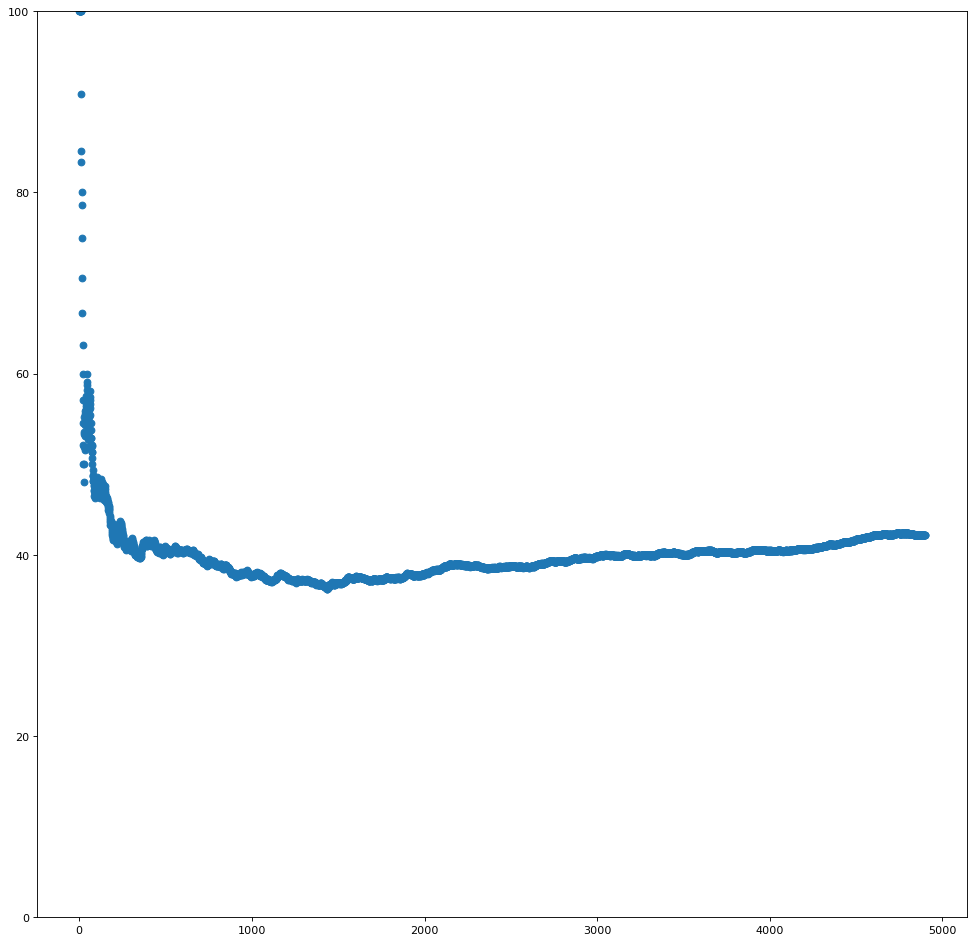

In [48]:
figure(figsize=(15, 15), dpi=80)
ax = plt.gca()
ax.set_ylim([0, 100])
plt.scatter(*zip(*values))
plt.show()